# Project: Will the game succeed?

## Description of project:

The project __Will the game succeed?__ used data from the online store __Ice__, which sells video games all over the world. The data had information about the user and expert reviews, genres, platforms, sales, and rating of videogames sold in 2016. The purpose of this project was to identify patterns that determine whether a video game will succeed in 2017. This project was used to identify patterns that determine whether a game succeeds or not, and also allow us to spot potential big winners and plan advertising campaigns.

For the analysis component of this project we looked at how many games were released in different years and also checked if the data for every period was significant? Similarly, we looked at how sales varied from platform to platform and chose the platforms with the greatest total sales, and build a distribution based on data for each year. From the list of platforms, we also analyzed platforms that used to be popular, but now have zero sales, and answered the question, __How long does it generally take for new platforms to appear and old ones to fade?__. 


Consequently, we determined the period we should take data for to build a prognosis for 2017. In other words, we decided to Work only with the data that we had decided is relevant and disregarded the data for previous years. With the use of relevant data, we analyzed Which platforms were leading in sales; Which ones were growing or shrinking; and selected several potentially profitable platforms. From a chosen pltform, we studied how user and professional reviews affected sales for this popular platform. Finally, the questions we answered included: 
- What can we say about the most profitable genres? 
- Can we generalize about genres with high and low sales?

### Dictionaries used for analysis

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Data used for analysis

The data collected from the online store __Ice__ was stored in the variable `data`. 

In [2]:
data = pd.read_csv('/datasets/games.csv')

## Description of data

### General Information of `data` 

The `data` contains a total of 11 columns, and 16,715 entries, each of them describing one video game. Below is a description of the columns in `data`. 
- 'Name': name of the video game
- `Platform`: console or platform used to play the video game
- `Year_of_Release`: year in which the game was released
- `Genre`: genre category of the videogame
- `NA_sales`: North American sales in USD million
- `EU_sales`: sales in Europe in USD million
- `JP_sales`: sales in Japan in USD million
- `Other_sales`: sales in other countries in USD million
- `Critic_Score`: expert review score for video game out of 100
- `User_Score`: users review score out of  10
- `Rating`: Entertainment Software Rating Board (ESRB) rating of a video game's content, assigned as an age rating such as Teen or Mature.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Description of missing values in columns

In `data`, the columns that presented missing values were: __Critic_Score, Rating, User_Score, Year_of_Release, Name and  Genre__ with missing values percentages of 51.32%, 40.48%, 40.10%, 1.61%, 0.012%, and 0.012%, respectively. 


In [4]:
data.isnull().mean().sort_values(ascending=False) 

Critic_Score       0.513192
Rating             0.404786
User_Score         0.400897
Year_of_Release    0.016093
Name               0.000120
Genre              0.000120
Platform           0.000000
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
dtype: float64

## Head of data

In [5]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


## Preparing the data

This section was used to prepare the data values in each of the columns of `data`, such as replacing missing values, deleting duplicates, and fix data types in columns. To ensure consistency in `data`, the column headers were changed to lower_case. 

In [6]:
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### `name` column

#### Fixing data type

The `name` column had a correct data type as object. No changes in fixing data type were made.

In [7]:
data.name.head(10)

0                   Wii Sports
1            Super Mario Bros.
2               Mario Kart Wii
3            Wii Sports Resort
4     Pokemon Red/Pokemon Blue
5                       Tetris
6        New Super Mario Bros.
7                     Wii Play
8    New Super Mario Bros. Wii
9                    Duck Hunt
Name: name, dtype: object

#### Fixing values in column 
The values in the `name` column had a combination of uppercase and lowercase. The values were converted to lowercase to find duplicates in `data`. The `name` column had a total of 11,559 unique entries for video game names. 

In [8]:
data['name'] = data.name.str.lower()
len(data.name.unique())

11560

#### Replacing missing values in column

The `name` column had a total of two missing values, which account for less than 1% of the data. These values were removed from the `data` because there was not an identifying factor that could help replace the missing values for these entries. A possible that these games have missing values in this column is because the information was not inputted. 

In [9]:
data.query('name.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data = data.query('name.notnull()')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Deleting duplicates

There were not duplicates in data after fixing `name`. 

In [11]:
data[data.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### `platform` column

The platform column describes the platform or console in which the video games is played. This column had a total of 16713 non-null entries out of 16713 entries, after deleting missing values in `name` column. 

In [12]:
data.platform.head(10)

0    Wii
1    NES
2    Wii
3    Wii
4     GB
5     GB
6     DS
7    Wii
8    Wii
9    NES
Name: platform, dtype: object

#### Fixing data type

`platform` column had a data type __object__, which is appropriate for this column. 

#### Fixing values in column

The `platform` column did not have any mispellings or additional spaces in its values that required fixing any of its values. It had a total of 31 unique values that represented the platforms in which the video game is played. 

In [13]:
data.platform.head()

0    Wii
1    NES
2    Wii
3    Wii
4     GB
Name: platform, dtype: object

In [14]:
data.platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

#### Replacing missing values in column 

The `platform` column did not present any missing values. 

### `genre` column 
The `genre` column had a total to 16713 non-null values out of 16713 entries, which means it did not present any values, after removing duplicates from the `name` column. The `genre` column had an appropriate data type of __object__. 

In [15]:
data.genre.head(10)

0          Sports
1        Platform
2          Racing
3          Sports
4    Role-Playing
5          Puzzle
6        Platform
7            Misc
8        Platform
9         Shooter
Name: genre, dtype: object

#### Fixing data type 

The __object__ data type was appropriate for this column. 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Fixing values in column

The unique values in the `genre` column did not present any misspellings or required any changes in any of its values. 

In [17]:
data.genre.unique() 

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

### `na_sales` column

The `na_sales` column describes the revenue from sales for each video game, in millions, in the North America region. There were a total of 16713 entries, without any missing values, after fixing the missing values in the `name` column. This column had an appropriate data type of __float64__. 

In [18]:
data.na_sales.head(10)

0    41.36
1    29.08
2    15.68
3    15.61
4    11.27
5    23.20
6    11.28
7    13.96
8    14.44
9    26.93
Name: na_sales, dtype: float64

#### Fixing values in column

The values in `na_sales` had a total of 402 unique values for revenue from sales in the North America region. To ensure there was a consistent number of decimals in the column, we rounded the values to 2 decimal points. The values in this column did not present any errors, such as the input of 8.43 million as 8,430,0000. 

In [19]:
data['na_sales']=round(data.na_sales, 2)

In [20]:
data.na_sales.unique()

array([4.136e+01, 2.908e+01, 1.568e+01, 1.561e+01, 1.127e+01, 2.320e+01,
       1.128e+01, 1.396e+01, 1.444e+01, 2.693e+01, 9.050e+00, 9.710e+00,
       9.000e+00, 8.920e+00, 1.500e+01, 9.010e+00, 7.020e+00, 9.430e+00,
       1.278e+01, 4.740e+00, 6.380e+00, 1.083e+01, 9.540e+00, 9.660e+00,
       8.410e+00, 6.060e+00, 3.430e+00, 5.510e+00, 6.850e+00, 9.040e+00,
       5.890e+00, 6.030e+00, 9.700e+00, 5.280e+00, 4.990e+00, 8.250e+00,
       8.520e+00, 5.540e+00, 6.990e+00, 6.620e+00, 5.030e+00, 5.990e+00,
       3.960e+00, 2.500e+00, 7.970e+00, 6.910e+00, 4.340e+00, 4.350e+00,
       3.010e+00, 6.160e+00, 6.760e+00, 4.020e+00, 4.890e+00, 2.960e+00,
       4.760e+00, 5.010e+00, 6.730e+00, 5.950e+00, 3.660e+00, 5.550e+00,
       7.040e+00, 6.650e+00, 3.880e+00, 5.800e+00, 4.100e+00, 5.930e+00,
       4.360e+00, 5.700e+00, 2.030e+00, 4.400e+00, 5.050e+00, 3.540e+00,
       1.120e+00, 6.820e+00, 1.750e+00, 3.740e+00, 1.060e+00, 2.790e+00,
       2.910e+00, 9.900e-01, 2.570e+00, 2.990e+00, 

###  `eu_sales` column 

The `eu_sales` column describes the revenue from sales for each video game, in millions, in the European region. There were a total of 16713 entries, without any missing values, after fixing the missing values in the `name` column. This column had an appropriate data type of __float64__. 



#### Fixing data types in column

The values in`eu_sales` column had a total of 307 unique values for revenue from sales in the European region. To ensure there was a consistent number of decimals in the column, we rounded the values to 2 decimal points. The values in this column did not present any errors, such as the input of 8.43 million as 8,430,0000. 

In [21]:
data.eu_sales.head(10)

0    28.96
1     3.58
2    12.76
3    10.93
4     8.89
5     2.26
6     9.14
7     9.18
8     6.94
9     0.63
Name: eu_sales, dtype: float64

In [22]:
data['eu_sales']=round(data.eu_sales, 2)

In [23]:
data.eu_sales.unique()

array([2.896e+01, 3.580e+00, 1.276e+01, 1.093e+01, 8.890e+00, 2.260e+00,
       9.140e+00, 9.180e+00, 6.940e+00, 6.300e-01, 1.095e+01, 7.470e+00,
       6.180e+00, 8.030e+00, 4.890e+00, 8.490e+00, 9.090e+00, 4.000e-01,
       3.750e+00, 9.200e+00, 4.460e+00, 2.710e+00, 3.440e+00, 5.140e+00,
       5.490e+00, 3.900e+00, 5.350e+00, 3.170e+00, 5.090e+00, 4.240e+00,
       5.040e+00, 5.860e+00, 3.680e+00, 4.190e+00, 5.730e+00, 3.590e+00,
       4.510e+00, 2.550e+00, 4.020e+00, 4.370e+00, 6.310e+00, 3.450e+00,
       2.810e+00, 2.850e+00, 3.490e+00, 1.000e-02, 3.350e+00, 2.040e+00,
       3.070e+00, 3.870e+00, 3.000e+00, 4.820e+00, 3.640e+00, 2.150e+00,
       3.690e+00, 2.650e+00, 2.560e+00, 3.110e+00, 3.140e+00, 1.940e+00,
       1.950e+00, 2.470e+00, 2.280e+00, 3.420e+00, 3.630e+00, 2.360e+00,
       1.710e+00, 1.850e+00, 2.790e+00, 1.240e+00, 6.120e+00, 1.530e+00,
       3.470e+00, 2.240e+00, 5.010e+00, 2.010e+00, 1.720e+00, 2.070e+00,
       6.420e+00, 3.860e+00, 4.500e-01, 3.480e+00, 

### `jp_sales` column 

The `jp_sales` column describes the revenue from sales for each video game, in millions, in Japan. There were a total of 16713 entries, without any missing values, after fixing the missing values in the `name` column. This column had an appropriate data type of __float64__. 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [25]:
data.jp_sales.head(10)

0     3.77
1     6.81
2     3.79
3     3.28
4    10.22
5     4.22
6     6.50
7     2.93
8     4.70
9     0.28
Name: jp_sales, dtype: float64

#### Fixing values in column 
The values in`jp_sales` column had a total of 244 unique values for revenue from sales in Japan. To ensure there was a consistent number of decimals in the column, we rounded the values to 2 decimal points. The values in this column did not present any errors, such as the input of 8.43 million as 8,430,0000. 

In [26]:
data['jp_sales']=round(data.jp_sales,2)

In [27]:
data.jp_sales.unique()

array([3.770e+00, 6.810e+00, 3.790e+00, 3.280e+00, 1.022e+01, 4.220e+00,
       6.500e+00, 2.930e+00, 4.700e+00, 2.800e-01, 1.930e+00, 4.130e+00,
       7.200e+00, 3.600e+00, 2.400e-01, 2.530e+00, 9.800e-01, 4.100e-01,
       3.540e+00, 4.160e+00, 6.040e+00, 4.180e+00, 3.840e+00, 6.000e-02,
       4.700e-01, 5.380e+00, 5.320e+00, 5.650e+00, 1.870e+00, 1.300e-01,
       3.120e+00, 3.600e-01, 1.100e-01, 4.350e+00, 6.500e-01, 7.000e-02,
       8.000e-02, 4.900e-01, 3.000e-01, 2.660e+00, 2.690e+00, 4.800e-01,
       3.800e-01, 5.330e+00, 1.910e+00, 3.960e+00, 3.100e+00, 1.100e+00,
       1.200e+00, 1.400e-01, 2.540e+00, 2.140e+00, 8.100e-01, 2.120e+00,
       4.400e-01, 3.150e+00, 1.250e+00, 4.000e-02, 0.000e+00, 2.470e+00,
       2.230e+00, 1.690e+00, 1.000e-02, 3.000e+00, 2.000e-02, 4.390e+00,
       1.980e+00, 1.000e-01, 3.810e+00, 5.000e-02, 2.490e+00, 1.580e+00,
       3.140e+00, 2.730e+00, 6.600e-01, 2.200e-01, 3.630e+00, 1.450e+00,
       1.310e+00, 2.430e+00, 7.000e-01, 3.500e-01, 

###  `other_sales` column 

The `jp_sales` column describes the revenue from sales for each video game, in millions, in countries in regions other than North America, Europe or Japan. There were a total of 16713 entries, without any missing values, after fixing the missing values in the `name` column. This column had an appropriate data type of __float64__. 

In [28]:
data.other_sales.head(10)

0    8.45
1    0.77
2    3.29
3    2.95
4    1.00
5    0.58
6    2.88
7    2.84
8    2.24
9    0.47
Name: other_sales, dtype: float64

#### Fixing values in column 
The values in`other
_sales` column had a total of 155 unique values for revenue from sales in other countries. To ensure there was a consistent number of decimals in the column, we rounded the values to 2 decimal points. The values in this column did not present any errors, such as the input of 8.43 million as 8,430,0000. 

In [29]:
data['other_sales']=round(data.other_sales,2)

In [30]:
data.other_sales.unique()

array([8.450e+00, 7.700e-01, 3.290e+00, 2.950e+00, 1.000e+00, 5.800e-01,
       2.880e+00, 2.840e+00, 2.240e+00, 4.700e-01, 2.740e+00, 1.900e+00,
       7.100e-01, 2.150e+00, 1.690e+00, 1.770e+00, 3.960e+00, 1.057e+01,
       5.500e-01, 2.040e+00, 1.360e+00, 4.200e-01, 4.600e-01, 1.410e+00,
       1.780e+00, 5.000e-01, 1.180e+00, 8.000e-01, 1.160e+00, 1.320e+00,
       5.900e-01, 2.380e+00, 1.130e+00, 7.800e-01, 2.420e+00, 1.120e+00,
       1.280e+00, 1.570e+00, 1.300e+00, 1.010e+00, 9.100e-01, 1.790e+00,
       1.970e+00, 8.600e-01, 1.210e+00, 2.300e-01, 7.600e-01, 7.400e-01,
       7.530e+00, 2.900e-01, 1.030e+00, 5.200e-01, 2.110e+00, 1.600e+00,
       1.610e+00, 3.500e-01, 9.700e-01, 1.060e+00, 6.300e-01, 1.500e-01,
       7.900e-01, 9.600e-01, 1.250e+00, 9.000e-01, 8.100e-01, 3.900e-01,
       6.800e-01, 8.500e-01, 1.800e-01, 8.000e-02, 6.700e-01, 7.000e-01,
       4.100e-01, 3.300e-01, 6.000e-01, 5.400e-01, 1.730e+00, 1.230e+00,
       1.600e-01, 1.110e+00, 3.100e-01, 4.800e-01, 

### `year_of_release` column

The `year_of_release` column had a total of 16444 entries, after deleting the missing values in the `name` column. There were a total of 269 missing values, which account for about 1.61% of data. 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Replacing missing values in column 

We noticed that some of values in the `name` column had the year in which the video game was released. The series `year_in_name` summarizes the numbers extracted from the column `year_of_release` in the table `missing_year`. Only the numeric values that represented a year were used to replace missing values in the column `year_of_release` in `data`.  A possible reason that these games have missing values in this column is because the information was not inputed. 

In [32]:
missing_year=data.query('year_of_release.isnull()')
missing_year




,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,fifa soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe smackdown vs. raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,pdc world championship darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Based on the results from `year_in_name`, we used the values for the following indices:
183,
377,
475,
1650,
2492,
2572,
3486,
4775 ,
5156 ,
5336 ,
5655 ,
5889 ,
8918 ,
13195,
13929,
15953,
16079, and 
16373, in the series `replacing_missing_year`. 

In [33]:
year_in_name=missing_year.name.str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)
year_in_name.sort_values(ascending=False).head(25) 

5336     2013
13195    2011
2572     2009
16373    2008
15953    2008
16079    2007
475      2006
13929    2006
8918     2005
5655     2005
377      2004
183      2004
2492     2003
1650     2003
5156     2003
4775     2003
5889     2003
3486     2002
6266      500
16293     148
12046      99
1301       99
7605       64
1609       57
3081       57
dtype: int64

In [34]:
replacing_missing_year=year_in_name.loc[year_in_name >2001]
replacing_missing_year

183      2004
377      2004
475      2006
1650     2003
2492     2003
2572     2009
3486     2002
4775     2003
5156     2003
5336     2013
5655     2005
5889     2003
8918     2005
13195    2011
13929    2006
15953    2008
16079    2007
16373    2008
dtype: int64

In [35]:
#replacing missing values in year_of release_column with values from replacing_missing_year
data.year_of_release.fillna(value=replacing_missing_year, axis='index', inplace=True)

#checking if replacing method applied to correct indices in data
data.query('index==183 or index==3081')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,madden nfl 2004,PS2,2004.0,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
3081,lego harry potter: years 5-7,DS,NaN,Action,0.34,0.25,0.00,0.07,69.0,tbd,E10+


After replacing to some of the missing values in `year_of_release` with the values from `replacing_missing_year`, we were left with 251 rows that still had missing values in this column, which account for 1.5% of rows. The `replacing_null_year` function was created to be applied in this column to replace the missing values from the average year in which games with the same name were released. The results from applying the function still showed a total of 251 rows with missing values in this column. Therefore, since the number of rows accounts for 1.5% of the data, these rows were removed from the `data`. 

In [36]:
data.query('year_of_release.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,space invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,agarest senki: re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,freaky flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [37]:
game_release_year=data.query('year_of_release.notnull()').pivot_table(index='name', values='year_of_release')


In [38]:
#replacing null values in column 
def replacing_null_years (row):
    name=row['name']
    year=row['year_of_release']
    
    if pd.isna(year)==False:
        return year 
    
    try:
        if pd.isna(year)==True: 
            return game_release_year[name]
    except: 
        return "error"


data['year_of_release']=data.apply(replacing_null_years, axis=1)

data.query('year_of_release=="error"')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,lego batman: the videogame,Wii,error,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,space invaders,2600,error,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,rock band,X360,error,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,frogger's adventures: temple of the frog,GBA,error,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,lego indiana jones: the original adventures,Wii,error,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,agarest senki: re-appearance,PS3,error,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,freaky flyers,GC,error,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,inversion,PC,error,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,hakuouki: shinsengumi kitan,PS3,error,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


After removing these rows with missing values in `data`, we were left with 98.49% of the original data. 

In [39]:
#infor after alteration in this column 
data=data.query('year_of_release != "error"')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  object 
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       9852 non-null   object 
 10  rating           9780 non-null   object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


#### Fixing data type in column

The `year_of_release` column had an inappropriate data type as __object__ and was replaced as __datetime64[ns]__, as shown below: 

In [40]:
data['year_of_release']=data['year_of_release'].astype('int')
data['year_of_release']=pd.to_datetime(data.year_of_release, format='%Y')
data['year_of_release']=data['year_of_release'].dt.year


In [41]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       9852 non-null   object 
 10  rating           9780 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


#### Removing duplicates in data

There were no duplicates in the data after working on `year_of_release` column. 

In [43]:
data[data.duplicated(keep='first')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### `critic_score` column

The `critic_score` column had a total of 7996 entries, and 8466 null values, which account for 51.4% of the data. There were no errors in the data values, as the scores ranged from 0 to 100. 

In [44]:
data.critic_score.head(10)

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
5     NaN
6    89.0
7    58.0
8    87.0
9     NaN
Name: critic_score, dtype: float64

In [45]:
data.query('critic_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [46]:
data.critic_score.unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

#### Fixing missing values in column 
We decided to leave the null values as they are because each video game has an unique review score. Replacing the average review for video games with the same or similar name, such as super mario bros, it would be a completely different experience if that video game was played in a different platform or if it were a newer version release of the game. The missing values remained as 'NaN' because we needed this column as __int64__ data type. A possible reason that this column has these missing values was because these games have not been reviewed by an expert.

#### Fixing data type in column 
The values in this column had an appropriate data type as __float64__. 

### `user_score` column 
The `user_score` column had a total of 9852 entries, and 6610 null values, which account for 40.2% of the data. There was a value labeled as 'tbd', which was replaced with a missing value. This was done to change date type as float for this column. 

In [47]:
data.user_score.head()

0      8
1    NaN
2    8.3
3      8
4    NaN
Name: user_score, dtype: object

In [48]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [49]:
data.query('user_score.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Fixing values in column 


In [50]:
data.user_score.replace('tbd', np.NaN, inplace=True)

#### Fixing missing values in column 
We decided to leave the null values as they are because each video game has an unique user review score. Replacing the average review for video games with the same or similar name, such as super mario bros, it would be a completely different experience if that video game was played in a different platform or if it were a newer version release of the game. A possible reason that this column has these missing values is because these games have not been reviewed by any users. 

#### Fixing data type in column 
The values in this column had an appropriate data type as __float64__. 

In [51]:
data['user_score']=data['user_score'].astype('float')

In [52]:
data.user_score.unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           9780 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### `rating` column 

The `rating` column had a total of 9,780 entries, and 6,682 null values, which account for 40.60% of the data. There were not misspellings or errors in data entry. To fix the missing value, we replaced them with an'unkown' label value because this column had a data type as __object__, and it is appropriate. A possible reason that this column has these missing values was because this game has not been rated by the ESRB. 

In [54]:
data.rating.head(10)

0      E
1    NaN
2      E
3      E
4    NaN
5    NaN
6      E
7      E
8      E
9    NaN
Name: rating, dtype: object

In [55]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [56]:
data.query('rating.isnull()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors: sanada maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,lma manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,haitaka no psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,spirits & spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Fixing missing values in column
The missing values were replaced with a 'unknown' value. 



In [57]:
data.rating.fillna('unknown', inplace=True)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown
5,tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,unknown
6,new super mario bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,wii play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,new super mario bros. wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,duck hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,unknown


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16462 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


### Enriching  data

The column 'total_sales' was added to summarize the total revenue each game brought, in millions,  from all regions, in 2016. 

In [59]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+ data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16462 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16462 non-null  object 
 1   platform         16462 non-null  object 
 2   year_of_release  16462 non-null  int64  
 3   genre            16462 non-null  object 
 4   na_sales         16462 non-null  float64
 5   eu_sales         16462 non-null  float64
 6   jp_sales         16462 non-null  float64
 7   other_sales      16462 non-null  float64
 8   critic_score     7996 non-null   float64
 9   user_score       7474 non-null   float64
 10  rating           16462 non-null  object 
 11  total_sales      16462 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Analyze the data 

### Games released per year 
The following section analyzed the number of games released per year. As shown in the boxplot, there were no outliers in the counts of video games released per year. The counts of video games released per year presented a mean of 444.91 video games released per year; a median value of 338 video games; and a standard deviation of 452.17 video games per year. The distribution was positively skewed, with a maximun value of 1,429 video games, and a minimum value of 9 video games released per year. 

In [61]:
games_per_year=data.pivot_table(index='year_of_release', aggfunc='size')

print(games_per_year)


year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     830
2003     780
2004     764
2005     941
2006    1008
2007    1198
2008    1429
2009    1427
2010    1255
2011    1137
2012     653
2013     545
2014     581
2015     606
2016     502
dtype: int64


count      37.000000
mean      444.918919
std       452.175628
min         9.000000
25%        36.000000
50%       338.000000
75%       764.000000
max      1429.000000
dtype: float64

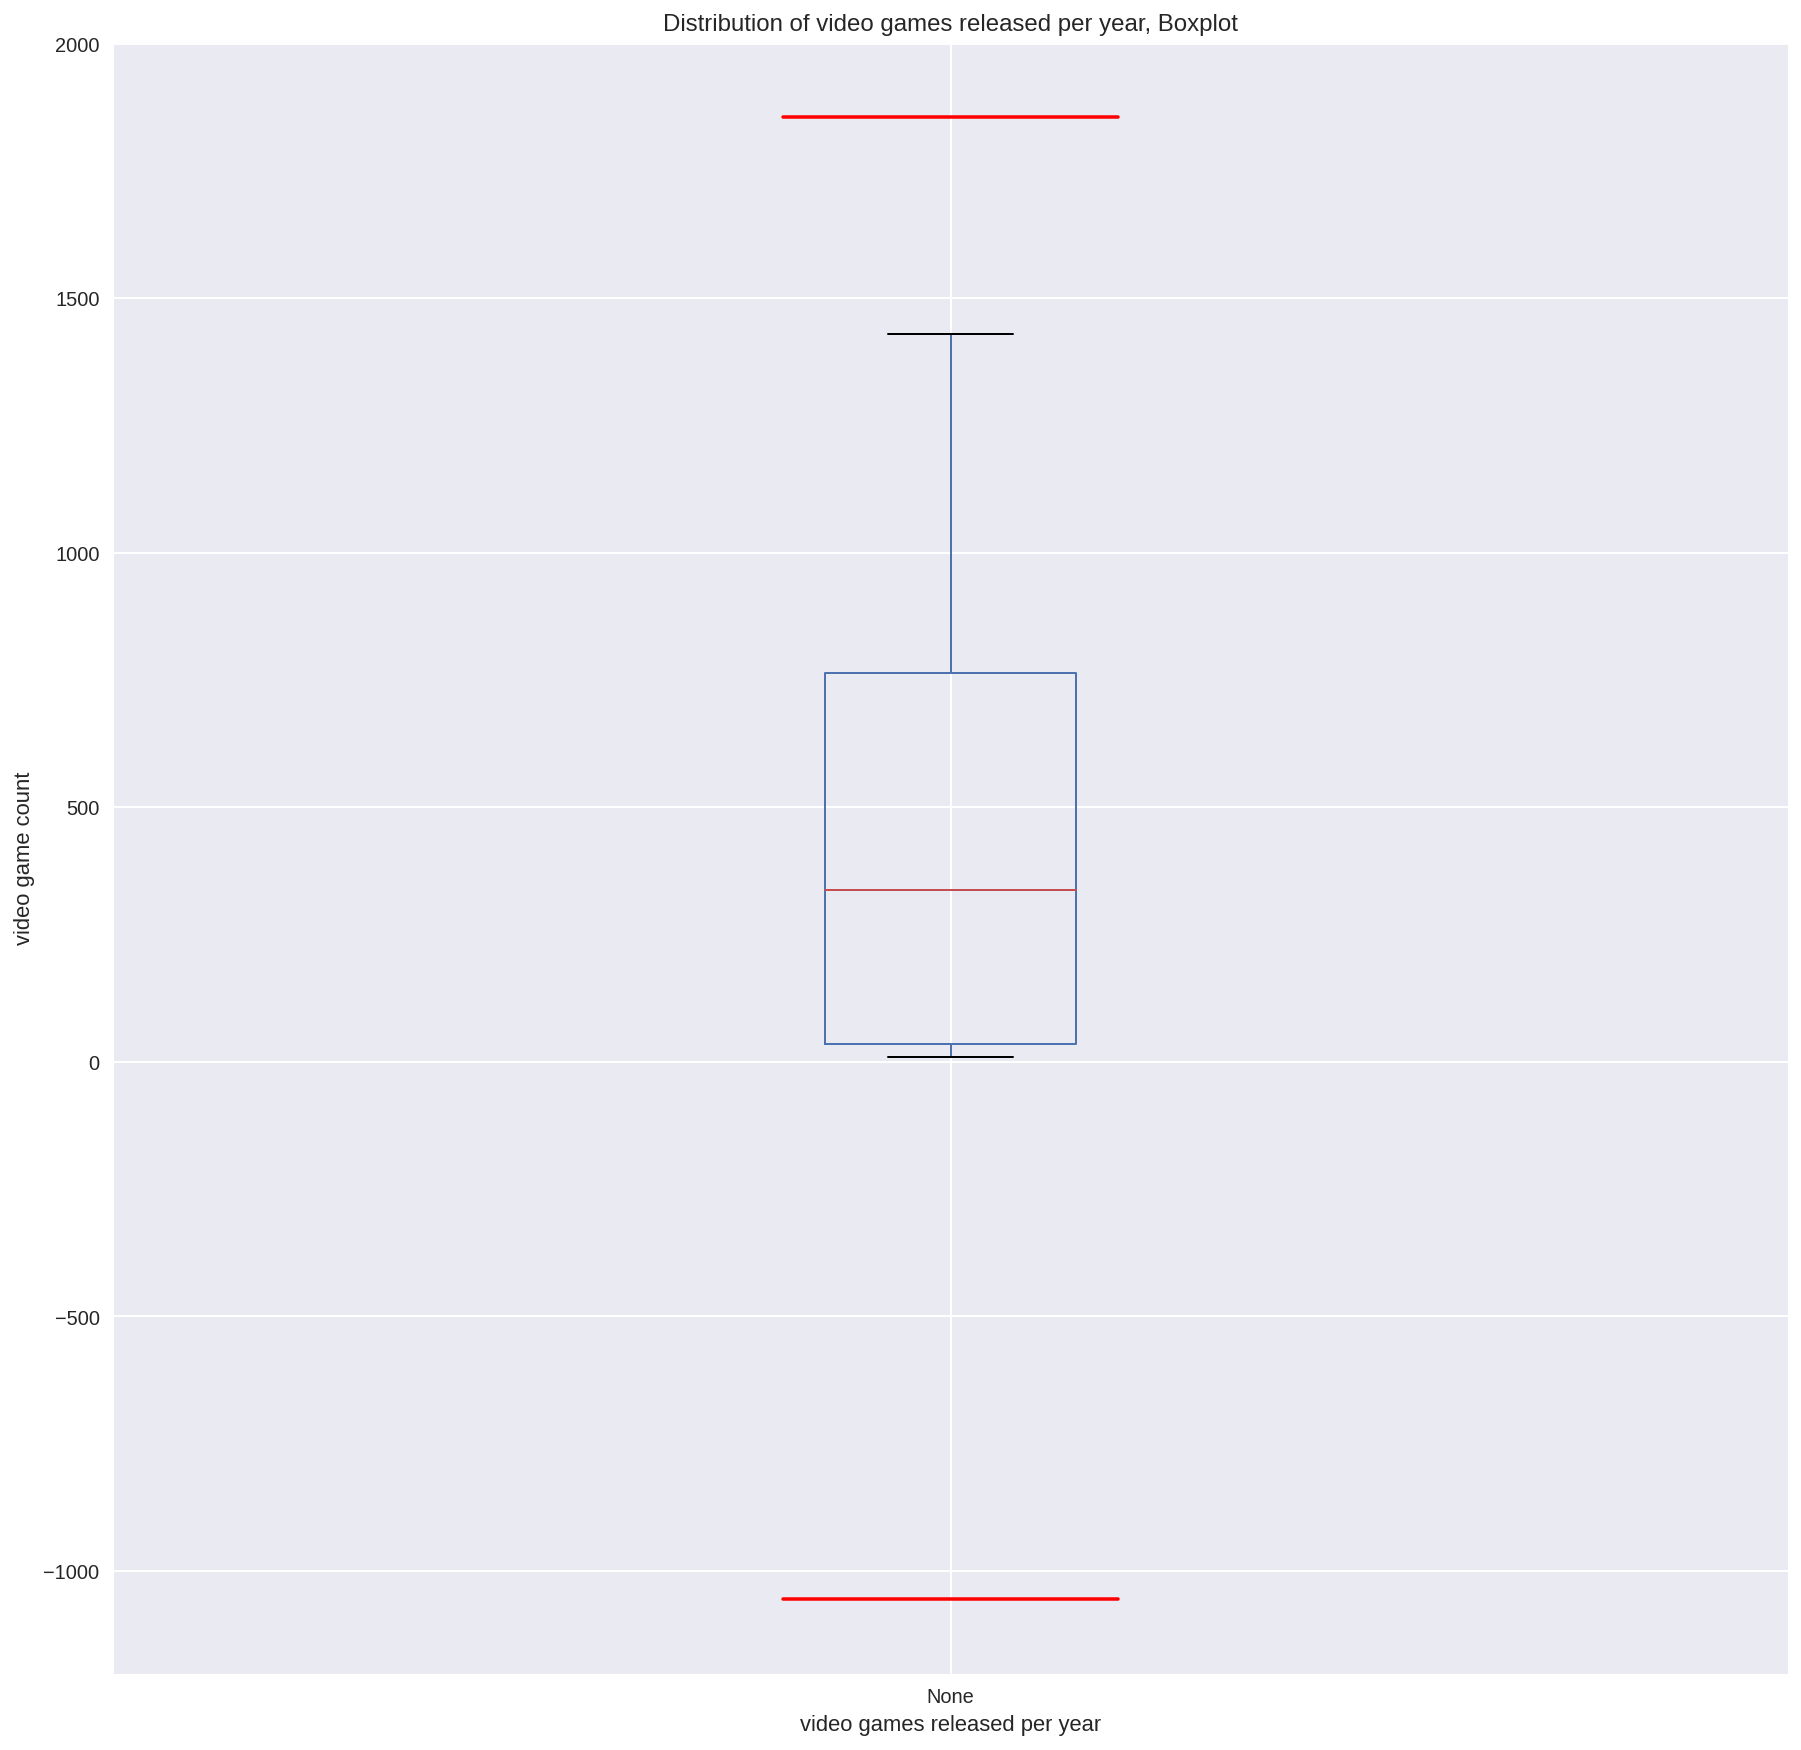

In [62]:
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

iqr=games_per_year.quantile(0.75)- games_per_year.quantile(0.25)


games_per_year.plot(kind='box',figsize=(15,15))
plt.ylabel('video game count')
plt.xlabel('video games released per year')
plt.title('Distribution of video games released per year, Boxplot')
plt.axhline(y=games_per_year.quantile(0.75) +1.5*iqr, xmin=0.4, xmax=0.6,  color = 'r', linestyle = '-')
plt.axhline(y=games_per_year.quantile(0.25) -1.5*iqr, xmin=0.4, xmax=0.6,  color = 'r', linestyle = '-')

games_per_year.describe()


### Pattern of sales per platform

This section analyzed the patterns of sales per platform. The `total_sales_per_platform` table summarizes the sum of total sales for each platform. The distribution had a mean of 284.88 USD millions from sales; a median value of 200.00 USD million dollars from sales; and a standard deviation 345.30 USD millions from sales. The distrbution presented outliers that were greater than 1.5*iqr, 720.8 USD millions. For our analysis, we selected values with the greatest sales that were greater thane 75% quartile of the distibution`total_sales_per_platform`. 

upper bound 1.5*iqr: 720.799999999992


,total_sales
count,31.000000
mean,284.888710
std,345.298692
min,0.030000
25%,22.150000
50%,200.040000
75%,301.610000
max,1248.120000


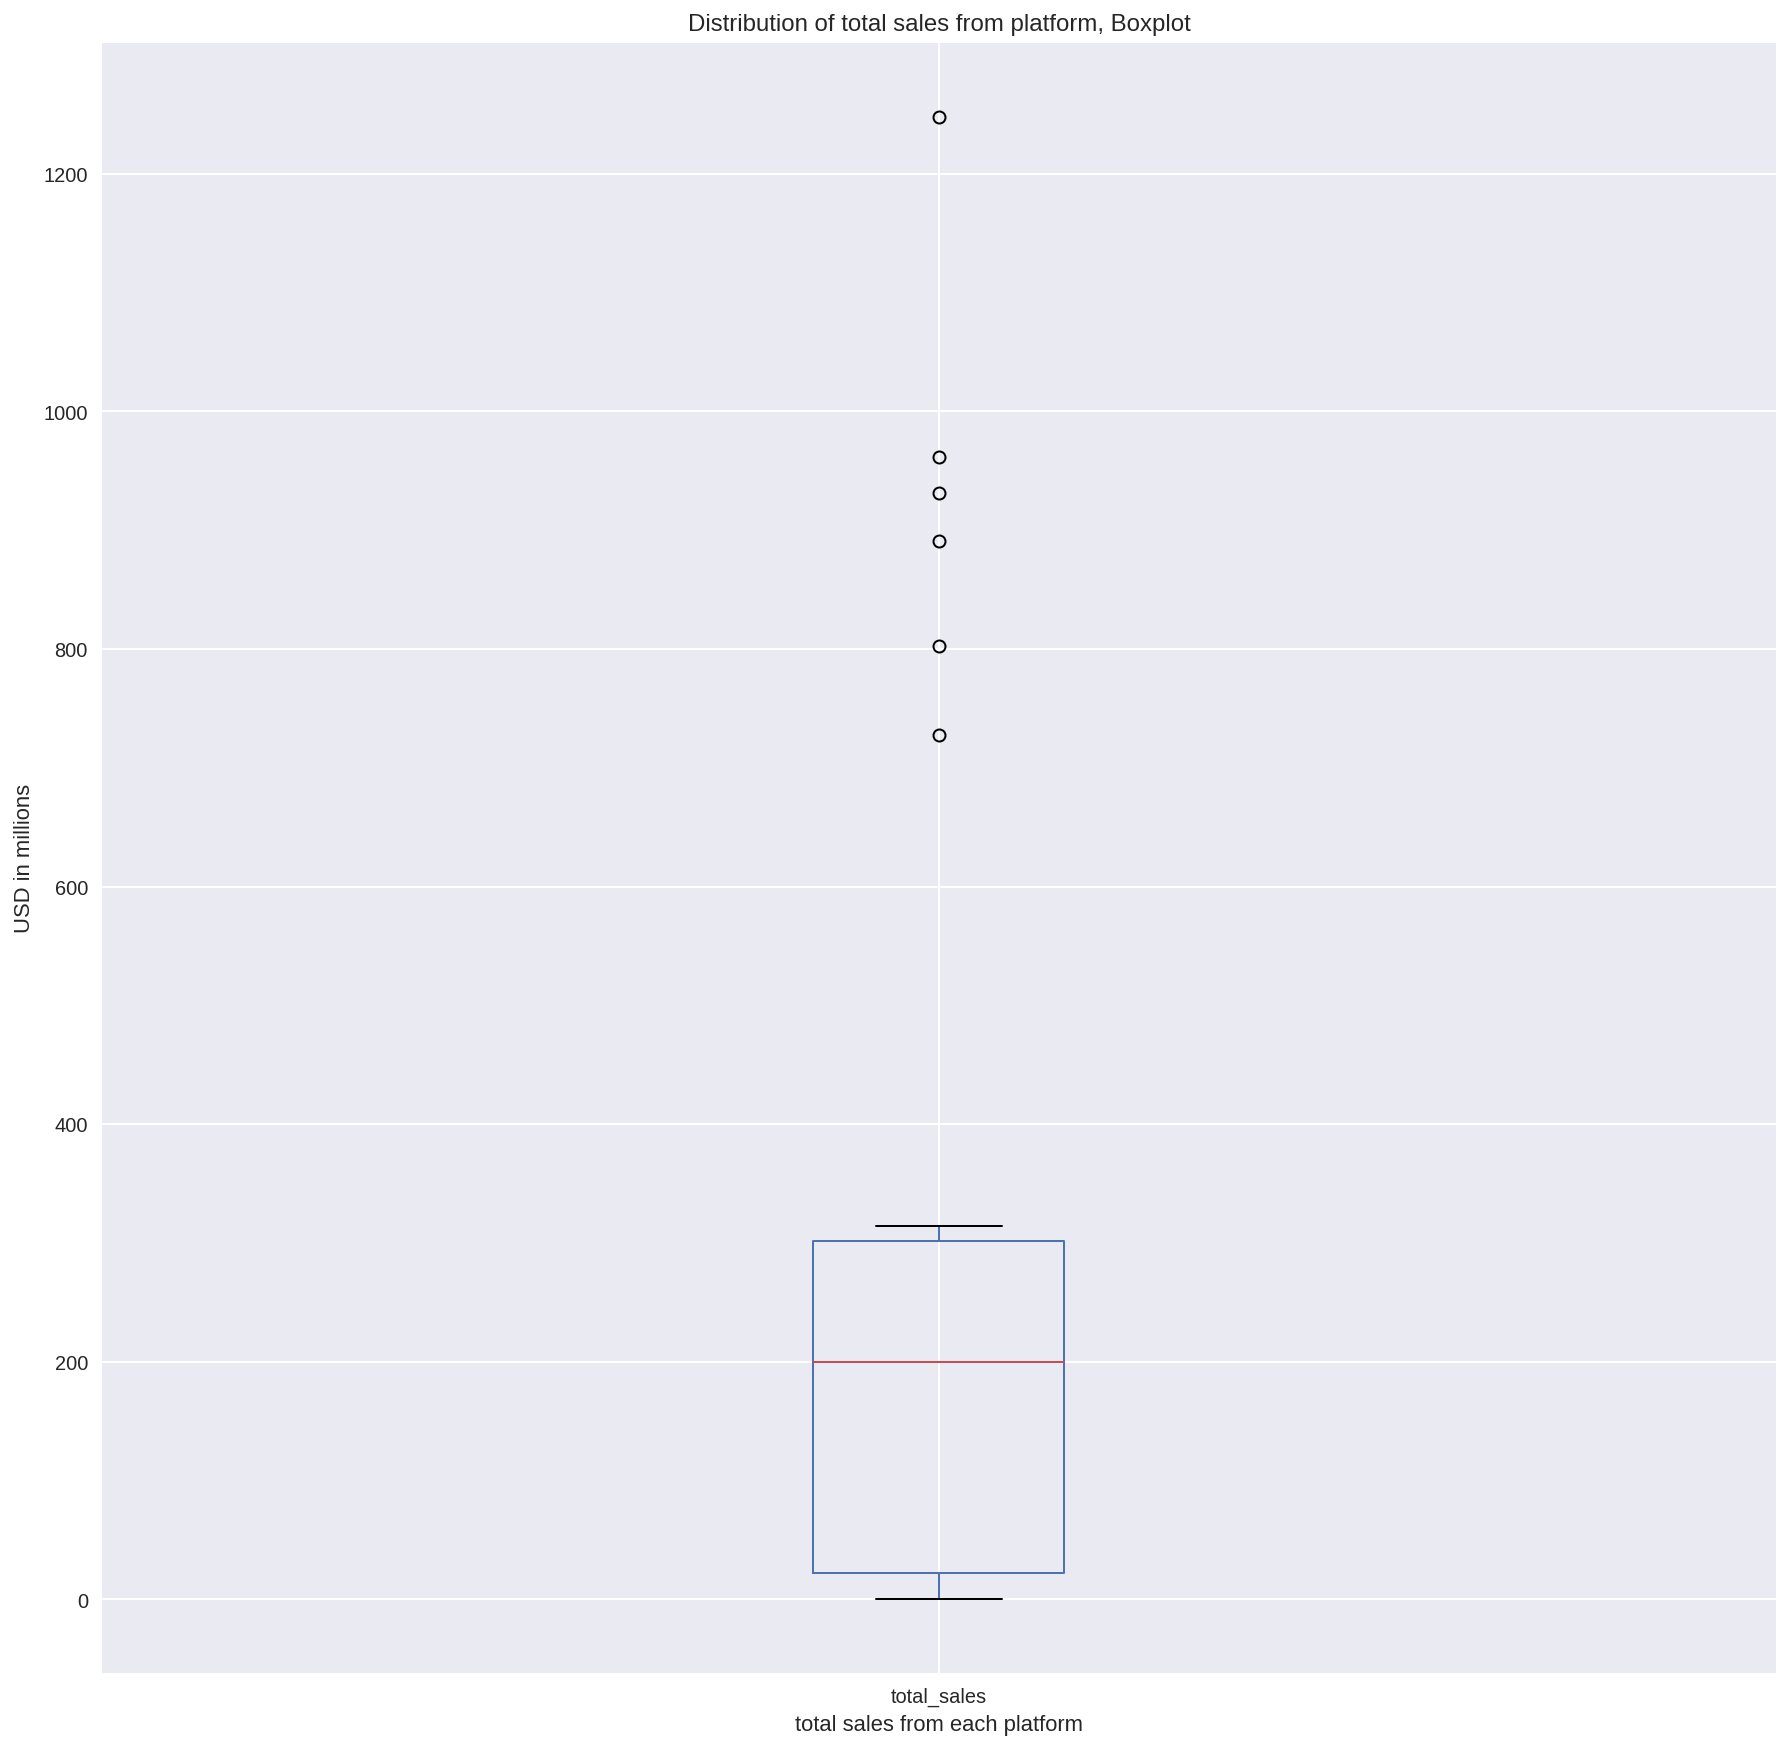

In [63]:
total_sales_per_platform=data.pivot_table(index='platform', values='total_sales', aggfunc='sum')

iqr=total_sales_per_platform.quantile(0.75)- total_sales_per_platform.quantile(0.25)

total_sales_per_platform.plot(kind='box',figsize=(15,15))
plt.ylabel('USD in millions')
plt.xlabel('total sales from each platform')
plt.title('Distribution of total sales from platform, Boxplot')

upper_bound=total_sales_per_platform.quantile(0.75) +1.5*iqr
print('upper bound 1.5*iqr:', upper_bound.item())

total_sales_per_platform.describe()


The platforms in `greatest_sales` table were used for further analysis for the patterns in sales. 

In [64]:

greatest_sales=total_sales_per_platform.query('total_sales > total_sales.quantile(0.75)')
greatest_sales.sort_values('total_sales',ascending=False)


,total_sales
platform,
PS2,1248.12
X360,961.30
PS3,931.34
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88


#### Platforms that used to be popular, and now have zero total sales. 
The `greatest_sales_plot` was used to plot the total sales per year for the platforms with total sales greater than 75% quartile. The plots for each of the platforms show a similar pattern, in that once the is released, the total sales increase. Eventually, the total sales reach to a maximum value and then, the total sales decrease. There are videogames that used to be popular, and now total sales of zero, at the time the data was collected in December 2016. Some of these videogames include: 
- DS	
- GBA	
- PS	
- PS2


_This data can be observed in the `greatest_data_pivot`. 

Text(0.5, 1.0, 'Distribution of total sales for platforms with greatest total sales (USD millions) per year')

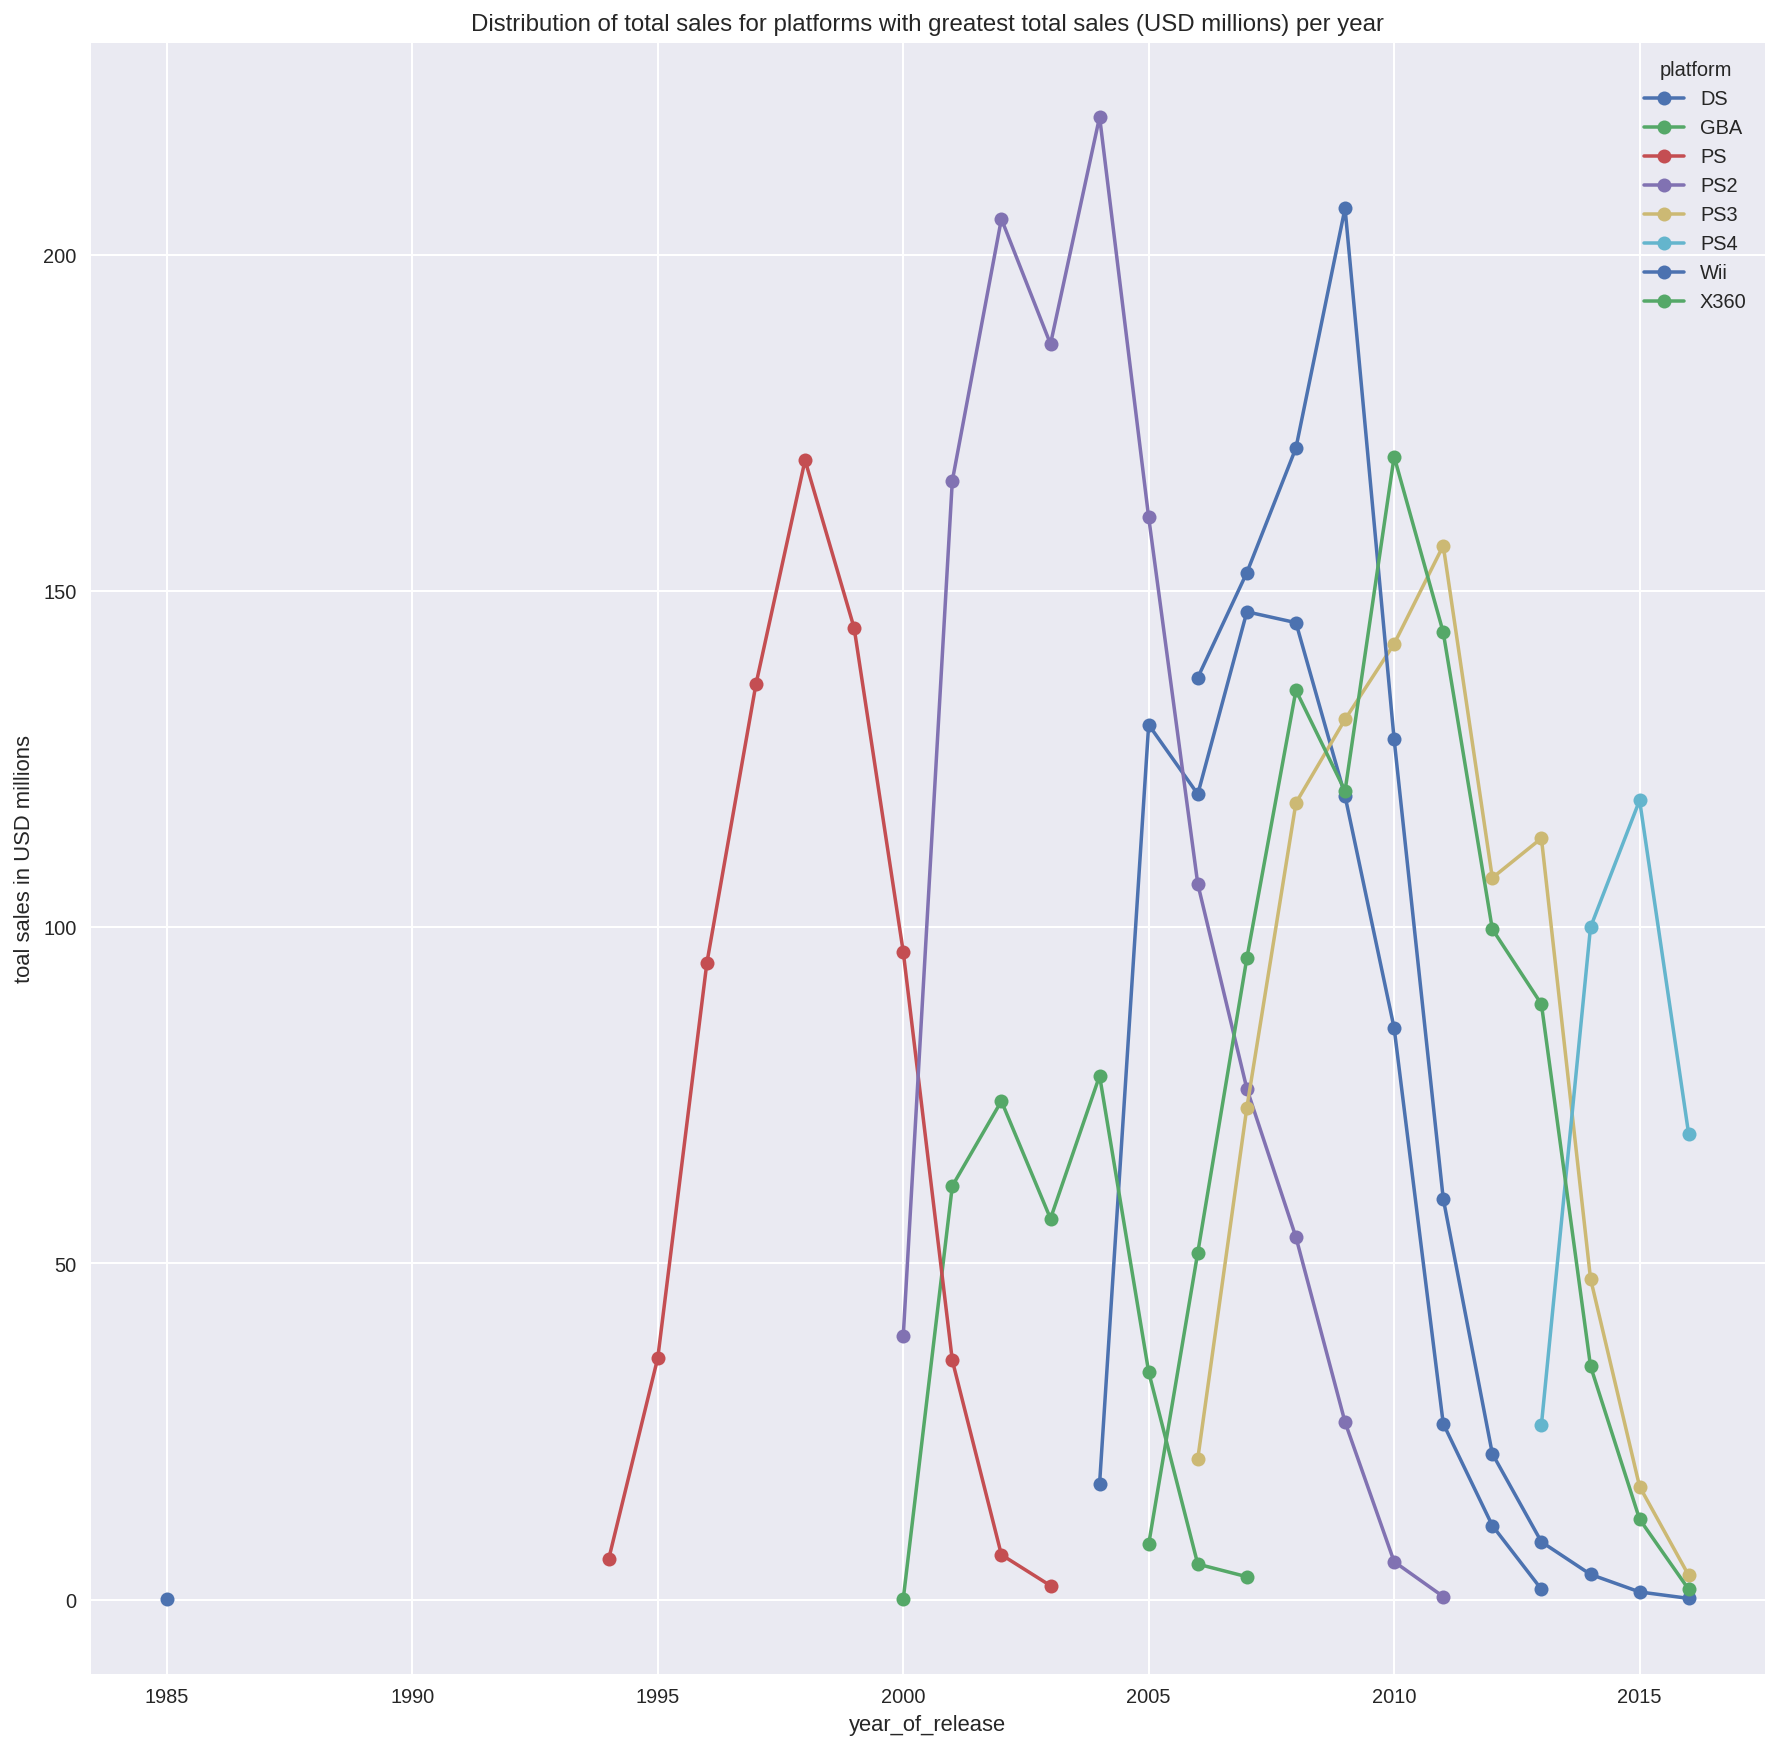

In [65]:
greatest_sales_data=data.query('platform in @greatest_sales.index.tolist()')

greatest_sales_plot=greatest_sales_data.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(
    style='o-', figsize=(15,15))


greatest_sales_plot
plt.ylabel('toal sales in USD millions')
plt.title('Distribution of total sales for platforms with greatest total sales (USD millions) per year')

In [66]:
greatest_sales_pivot=greatest_sales_data.pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

greatest_sales_pivot.query('year_of_release==2016')

platform,DS,GBA,PS,PS2,PS3,PS4,Wii,X360
year_of_release,,,,,,,,
2016,NaN,NaN,NaN,NaN,3.6,69.25,0.18,1.52


#### How long does it take for old platforms to fade?

The following section was used to analyze the time in which platforms tend to fade. In other words, we analyzed the difference, in years, between the time a platform reached its maximum in sales, and the last time it had sales. This information is summarized in the `greatest_sales_max_last_year` table. Below is a description of each of the column in the `greatest_sales_max_last_year` table. 
- `platform`: platform in which video games were played. 
- `initial_year`: year in which platform started making sales
- `maximum_sales_year`: year in which the platform reached its maximum in sales per year. 
- `last_year_sales`: last year in which the platform had sales. 
- `sales_span`: years in which the platform had sales

In [67]:
greatest_sales_platforms=['DS', 'GBA', 'PS', 'PS2', 'PS3', 'PS4', 'Wii', 'X360']

for p in greatest_sales_platforms:
    initial_year=greatest_sales_pivot.apply(pd.Series.first_valid_index)[p]
    year_max=greatest_sales_pivot.loc[greatest_sales_pivot[p]==greatest_sales_pivot[p].max()][p].index.item()
    last_year_min=greatest_sales_pivot.apply(pd.Series.last_valid_index)[p]

    print (f'[\'{p}\', {initial_year},{year_max}, {last_year_min}],')


['DS', 1985,2007, 2013],
['GBA', 2000,2004, 2007],
['PS', 1994,1998, 2003],
['PS2', 2000,2004, 2011],
['PS3', 2006,2011, 2016],
['PS4', 2013,2015, 2016],
['Wii', 2006,2009, 2016],
['X360', 2005,2010, 2016],


In [68]:
greatest_max_min_values=[
    ['DS', 1985,2007, 2013],
['GBA', 2000,2004, 2007],
['PS', 1994,1998, 2003],
['PS2', 2000,2004, 2011],
['PS3', 2006,2011, 2016],
['PS4', 2013,2015, 2016],
['Wii', 2006,2009, 2016],
['X360', 2005,2010, 2016],  
]

greatest_sales_max_last_year=pd.DataFrame(greatest_max_min_values, columns=[
    'platform','initial_year', 'maximum_sales_year', 'last_year_sales'])
greatest_sales_max_last_year

#column to take difference between maximum_sales_year and last_year_sales
greatest_sales_max_last_year['fade_span']= greatest_sales_max_last_year.last_year_sales- greatest_sales_max_last_year.maximum_sales_year
greatest_sales_max_last_year['sales_span']= greatest_sales_max_last_year.last_year_sales- greatest_sales_max_last_year.initial_year
greatest_sales_max_last_year


,platform,initial_year,maximum_sales_year,last_year_sales,fade_span,sales_span
0,DS,1985,2007,2013,6,28
1,GBA,2000,2004,2007,3,7
2,PS,1994,1998,2003,5,9
3,PS2,2000,2004,2011,7,11
4,PS3,2006,2011,2016,5,10
5,PS4,2013,2015,2016,1,3
6,Wii,2006,2009,2016,7,10
7,X360,2005,2010,2016,6,11


The distribution below shows the initial year of sales for the platforms with greatest sales. The distribution shows an outlier for the DS platform with a value of 1985, in which it started selling. The distribution presented a mean of 2001, median value of 2002, and stadard deviation of 8.59 year. For our analysis about, how long does it take for old platforms to fade? We selected platforms that were below or equal to the median value for initial year of sales. The analysis is depicted below. 

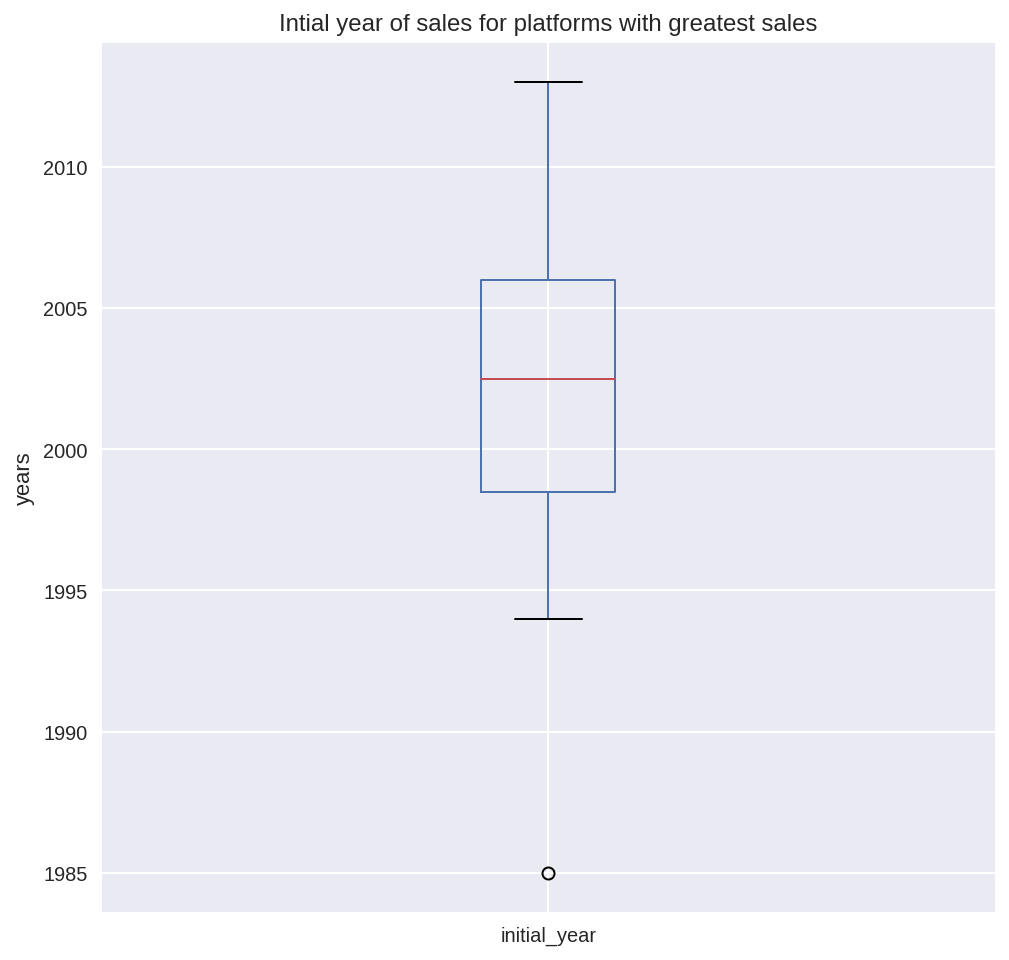

count       8.000000
mean     2001.125000
std         8.592979
min      1985.000000
25%      1998.500000
50%      2002.500000
75%      2006.000000
max      2013.000000
Name: initial_year, dtype: float64

In [69]:
greatest_sales_max_last_year.initial_year.plot(kind='box', figsize=(8,8))
plt.title('Intial year of sales for platforms with greatest sales')
plt.ylabel('years')
plt.show()
greatest_sales_max_last_year.initial_year.describe()


We considered platforms that were below or equal to the median value for initial year, for platforms with greatest sales, as 'Old'. This section was used to analize the time it takes for old platforms to fade. From the distribution below, we observed that on average, it took old platforms 5 years to observe a fade in sales after it reached its maximum sales per year. The distibution had a median value of 5.5 years, and a standard deviation of 2.07 years. 

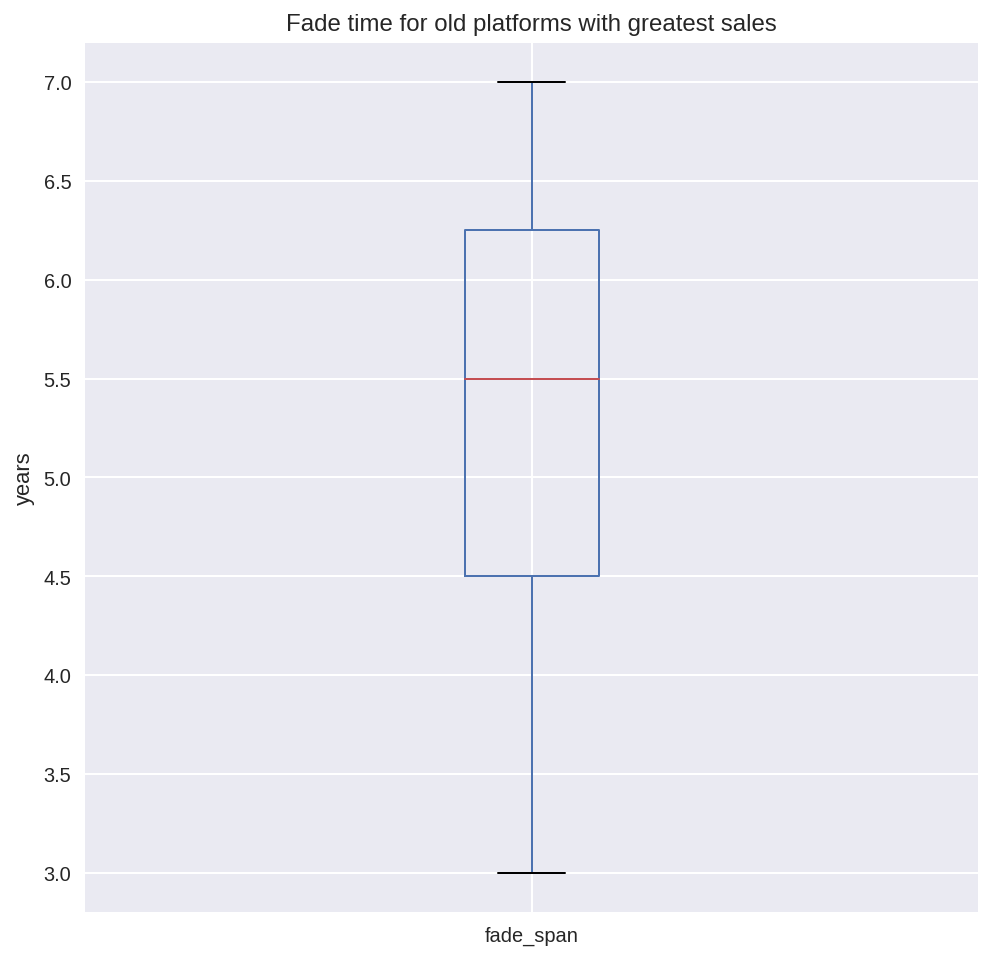

count    8.000000
mean     5.000000
std      2.070197
min      1.000000
25%      4.500000
50%      5.500000
75%      6.250000
max      7.000000
Name: fade_span, dtype: float64

In [70]:
greatest_sales_max_last_year.query('initial_year <= initial_year.median()').fade_span.plot(kind='box', figsize=(8,8))
plt.title('Fade time for old platforms with greatest sales')
plt.ylabel('years')
plt.show()
greatest_sales_max_last_year.fade_span.describe()


#### How long does it take for new platforms to appear? 
The section below was used to analyze the amount of years it takes for new platforms to appear. We used data from platfoms that had total sales values higher than 75% percentile in total sales. To find how long it takes for new platforms to appear, we sorted the initial years of sales in ascending order; and then, we took the difference, in years, between the initial year of sales of each platform and the initial year of sales from the precceeding platform. The results are depicted below. Based on the results, we found that on average, it takes 4 years for a new platform to appear. The distribution presented a median values of 5 years; a standard deviaton of 3.65 years; a minimum value of 0 years; and a maximum value of 9 years for new platforms to appear. 

In [71]:
greatest_sales_max_last_year.initial_year.sort_values().diff()

0    NaN
2    9.0
1    6.0
3    0.0
7    5.0
4    1.0
6    0.0
5    7.0
Name: initial_year, dtype: float64

In [72]:
greatest_sales_max_last_year.initial_year.sort_values().diff().agg(['min','mean', 'median', 'std','max'])

min       0.000000
mean      4.000000
median    5.000000
std       3.651484
max       9.000000
Name: initial_year, dtype: float64

### Selecting relevant games from data

This section was used to select relevant video games from `data` that give a prognosis for 2017. In this section, we analyzed the years in which platforms, with greatest sales, take to reach a maximum point in total sales per year after initial year of sales. This period of time determines the time in which there's an increasing relationship for total sales and time. For this, we created a new column, __increasing_sales_span__, in the `greatest_sales_max_last_year` and found its distribution. For out calculations.

In [73]:
greatest_sales_max_last_year['increasing_sales_span']=greatest_sales_max_last_year.maximum_sales_year - greatest_sales_max_last_year.initial_year
greatest_sales_max_last_year

,platform,initial_year,maximum_sales_year,last_year_sales,fade_span,sales_span,increasing_sales_span
0,DS,1985,2007,2013,6,28,22
1,GBA,2000,2004,2007,3,7,4
2,PS,1994,1998,2003,5,9,4
3,PS2,2000,2004,2011,7,11,4
4,PS3,2006,2011,2016,5,10,5
5,PS4,2013,2015,2016,1,3,2
6,Wii,2006,2009,2016,7,10,3
7,X360,2005,2010,2016,6,11,5


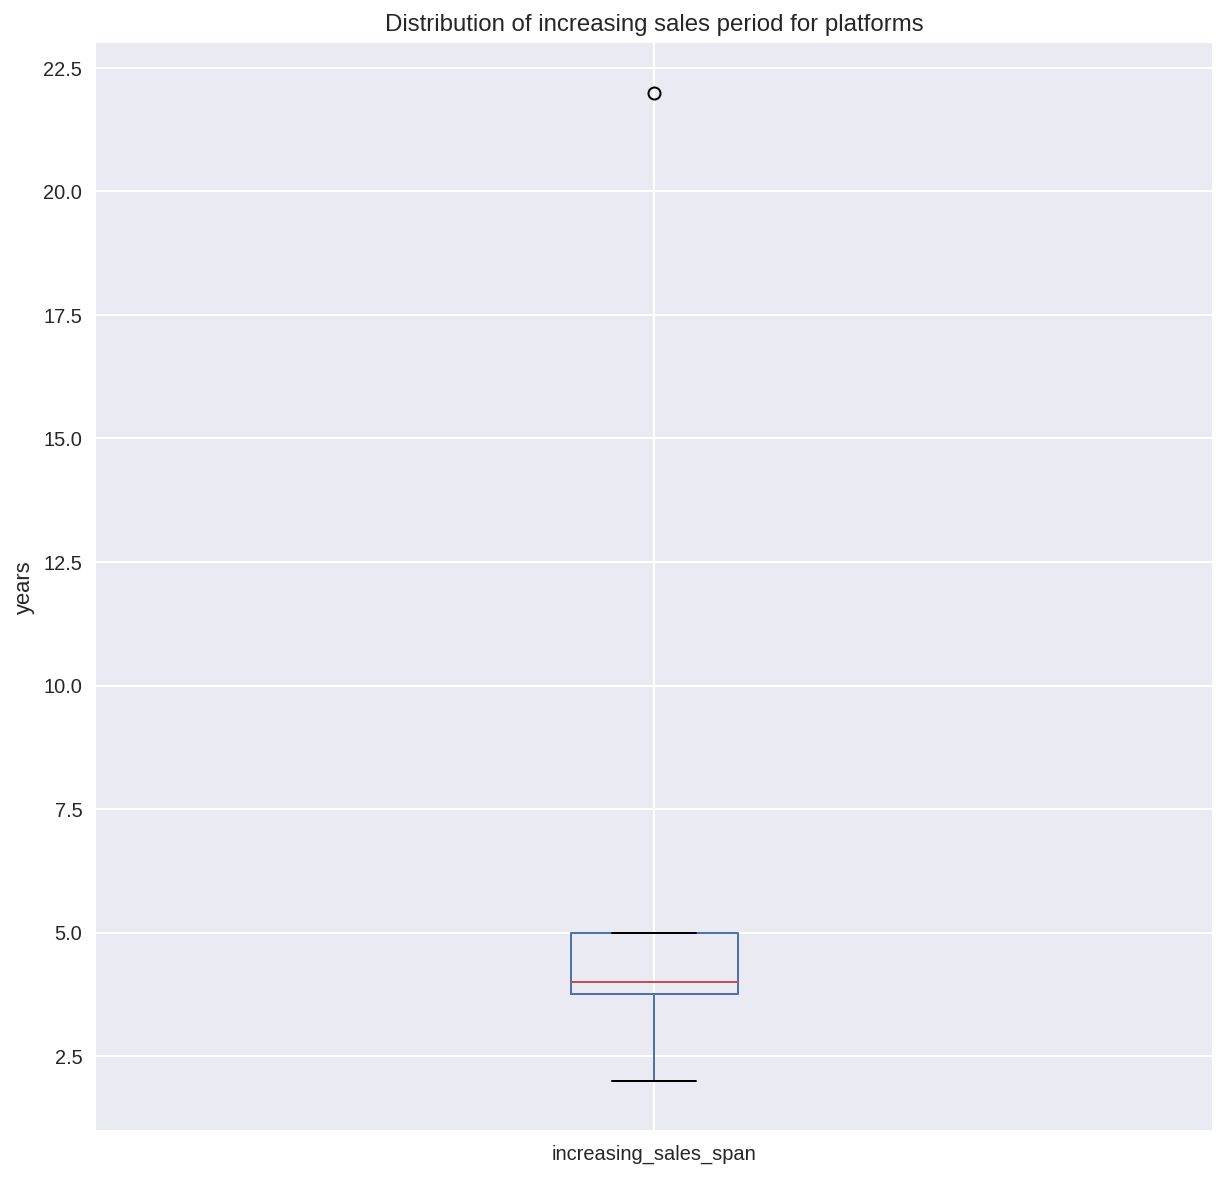

count     8.000000
mean      6.125000
std       6.490377
min       2.000000
25%       3.750000
50%       4.000000
75%       5.000000
max      22.000000
Name: increasing_sales_span, dtype: float64

In [74]:
greatest_sales_max_last_year.increasing_sales_span.plot(kind='box', figsize=(10,10))
plt.title('Distribution of increasing sales period for platforms')
plt.ylabel('years')
plt.show()
greatest_sales_max_last_year.increasing_sales_span.describe()



Based on the distribution, we concluded that platforms usually have, on average, 6.13 years, a median value of 4 years, and standard deviation of 6.49 years, since their initial year of sales to reach a maximum point in total sales per year. Since the distribution presented an outlier, we selected video games that had been released within 4 years of 2016. With this data, we expect video games that were released in 2013 and later to reach a maximum point or have a positive slope in total sales per year, during the year of 2017. Also, we selected video games that had total sales greater 0. This selection of data was stored in the variable `relevant_data`. PSP and DS were removed from `relevant_data` as they had NaN values for sales from games released in 2016.

In [75]:
relevant_years=[2013,2014,2015,2016]
relevant_data=data.query('year_of_release in @relevant_years and total_sales>0')
relevant_data=relevant_data.query('platform !="DS" and platform !="PSP" ')
relevant_data.head(10)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,grand theft auto v,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,grand theft auto v,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,call of duty: black ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,pokemon x/pokemon y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
42,grand theft auto v,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
60,call of duty: ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,call of duty: ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,unknown,9.18
77,fifa 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


### Platforms with growing and shrinking total sales

In this section, we analyzed the total sales patters from `relevant_data`. As depicted in the `relevant_total_sales` bar plot, we observe the top 3 leading platforms with highest total sales are PS4, PS3, and XOne, with total sales values, in million USD, of 314.14, 181.43, and 159.32, respectively. The bottom 3 platforms with lowest total sales were Wii, PSV, and PC with total sale values , in million USD, of 13.66,32.99, and 39.79, respectively. 

#### Leading total sales platforms

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.78
PSV,32.99
Wii,13.66


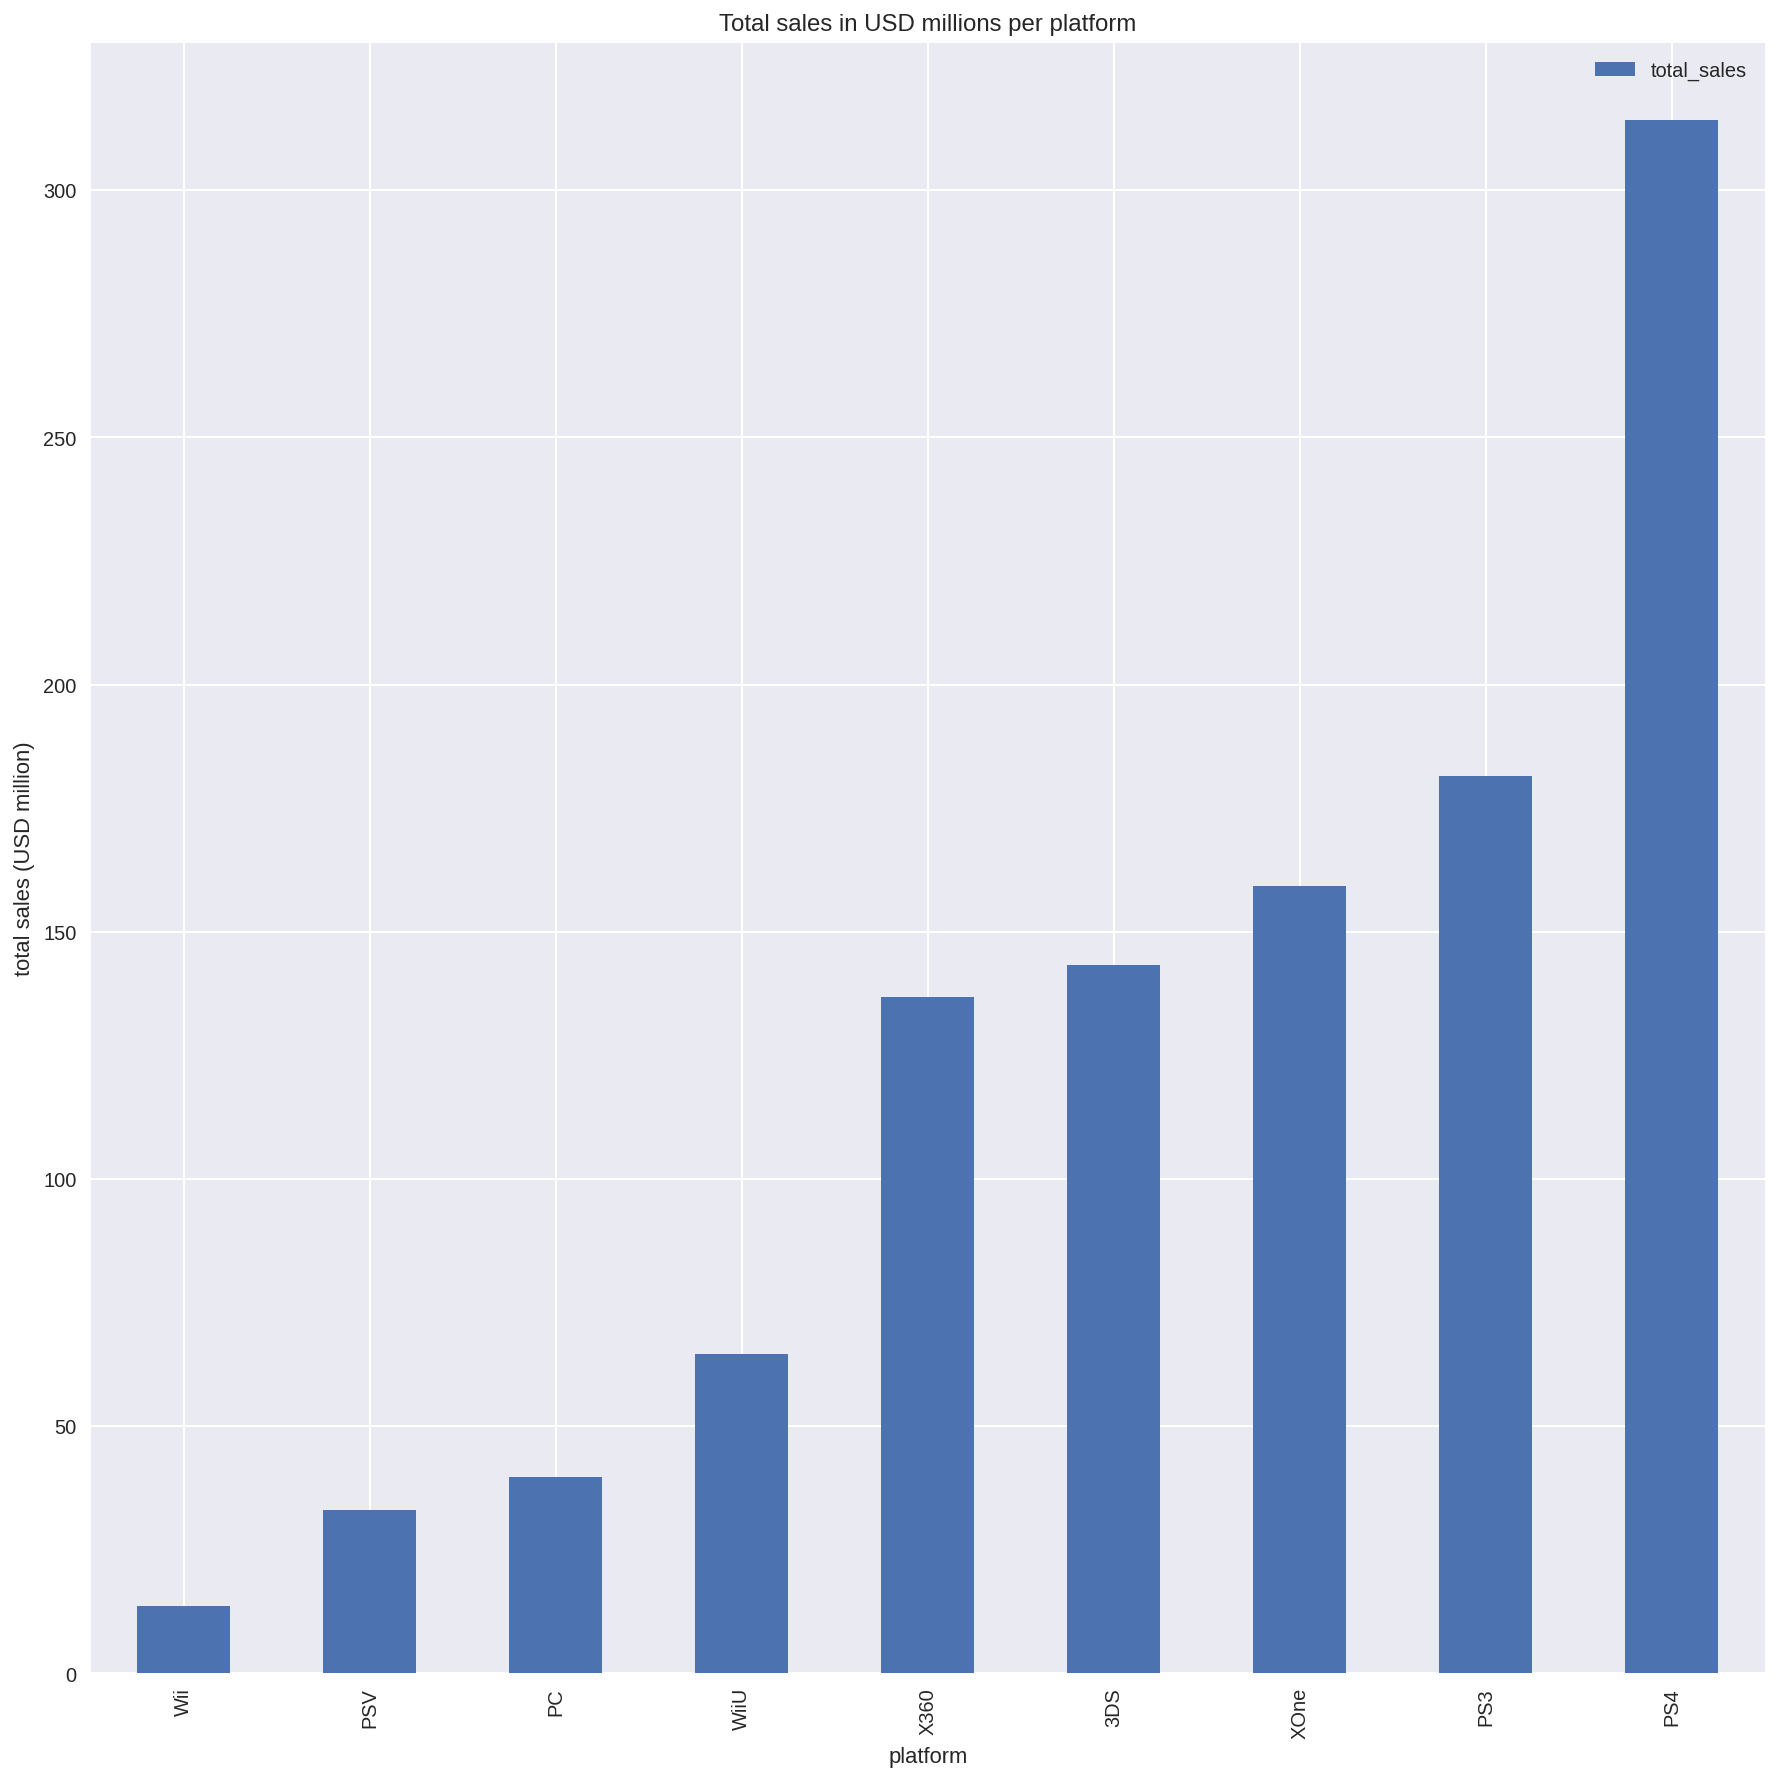

In [76]:
relevant_total_sales=relevant_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    'total_sales').plot(kind='bar', figsize=(15,15))
plt.ylabel('total sales (USD million)')
plt.title('Total sales in USD millions per platform')

relevant_data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

#### Growing and shrinking patterns 

To analyze the platforms that were growing or shrinking, we created analyzed the average in the difference of total sales per year for each platform.

The average difference comparison tells us if a platform is either growing or shrinking based on the total sales made per each year in comparison to the previous year. The plot and table produced with the table `sales_patterns_per_year`, depics the average difference of total sales per year, per total years. A negative value in the average difference meant that, on average, a platform was producing less total sales in comparison to the previous year. A positive value of the average meant that, on average, the platform had greater total sales in comparison to the previous year. In this section, we labeled platforms with a negative average difference value as 'shirking', and a positive average value as 'growing'. The labels are listed below: 



- `PS3`: shrinking, average difference -36.55 total sales/year 
- `X360`: shrinking, average difference -29.02 total sales/year 
- `3DS`:  shrinking, average difference -13.81 total sales/year 
- `WiiU`: shrinking, average difference -5.68 total sales/year 
- `Wii`: shrinking, average difference -2.80 total sales/year 
- `PC`: shrinking, average difference -2.49 total sales/year 
- `PSV`: shrinking, average difference -2.11 total sales/year 
- `XOne`: growing, average difference 2.39 total sales/ year 
- `PS4`: growing, average difference 14.42 total sales/ year 

In [77]:
sales_patterns_per_year=relevant_data.pivot_table(
     index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

sales_patterns_per_year

platform,3DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,12.73,113.25,25.99,10.59,8.59,21.65,88.58,18.96
2014,43.76,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


platform
PS3    -36.550000
X360   -29.020000
3DS    -13.810000
WiiU    -5.683333
Wii     -2.803333
PC      -2.493333
PSV     -2.113333
XOne     2.396667
PS4     14.420000
dtype: float64


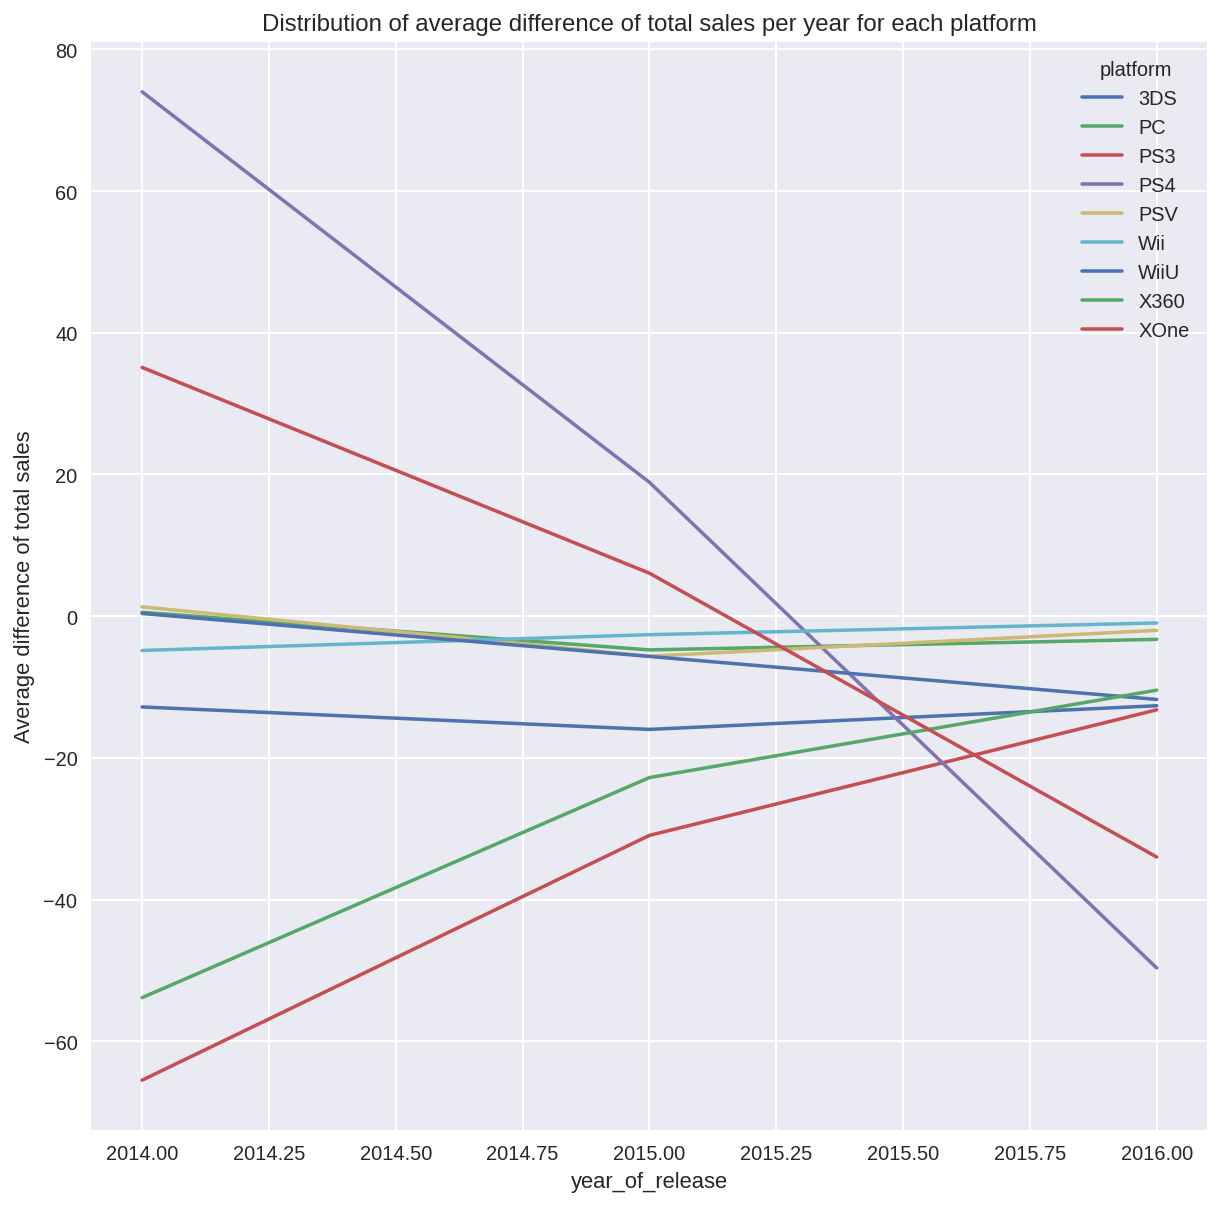

In [78]:
print(sales_patterns_per_year.diff().mean().sort_values())

sales_patterns_per_year.diff().plot(kind='line', figsize=(10,10))
plt.title('Distribution of average difference of total sales per year for each platform')
plt.ylabel('Average difference of total sales')
plt.show()

### Distribution of total sales per plaform

The following section was to analyze the global, total sales for video games for each platform category. The `global_sales_platform` plot depicts the distribution of total sales per each platform. 

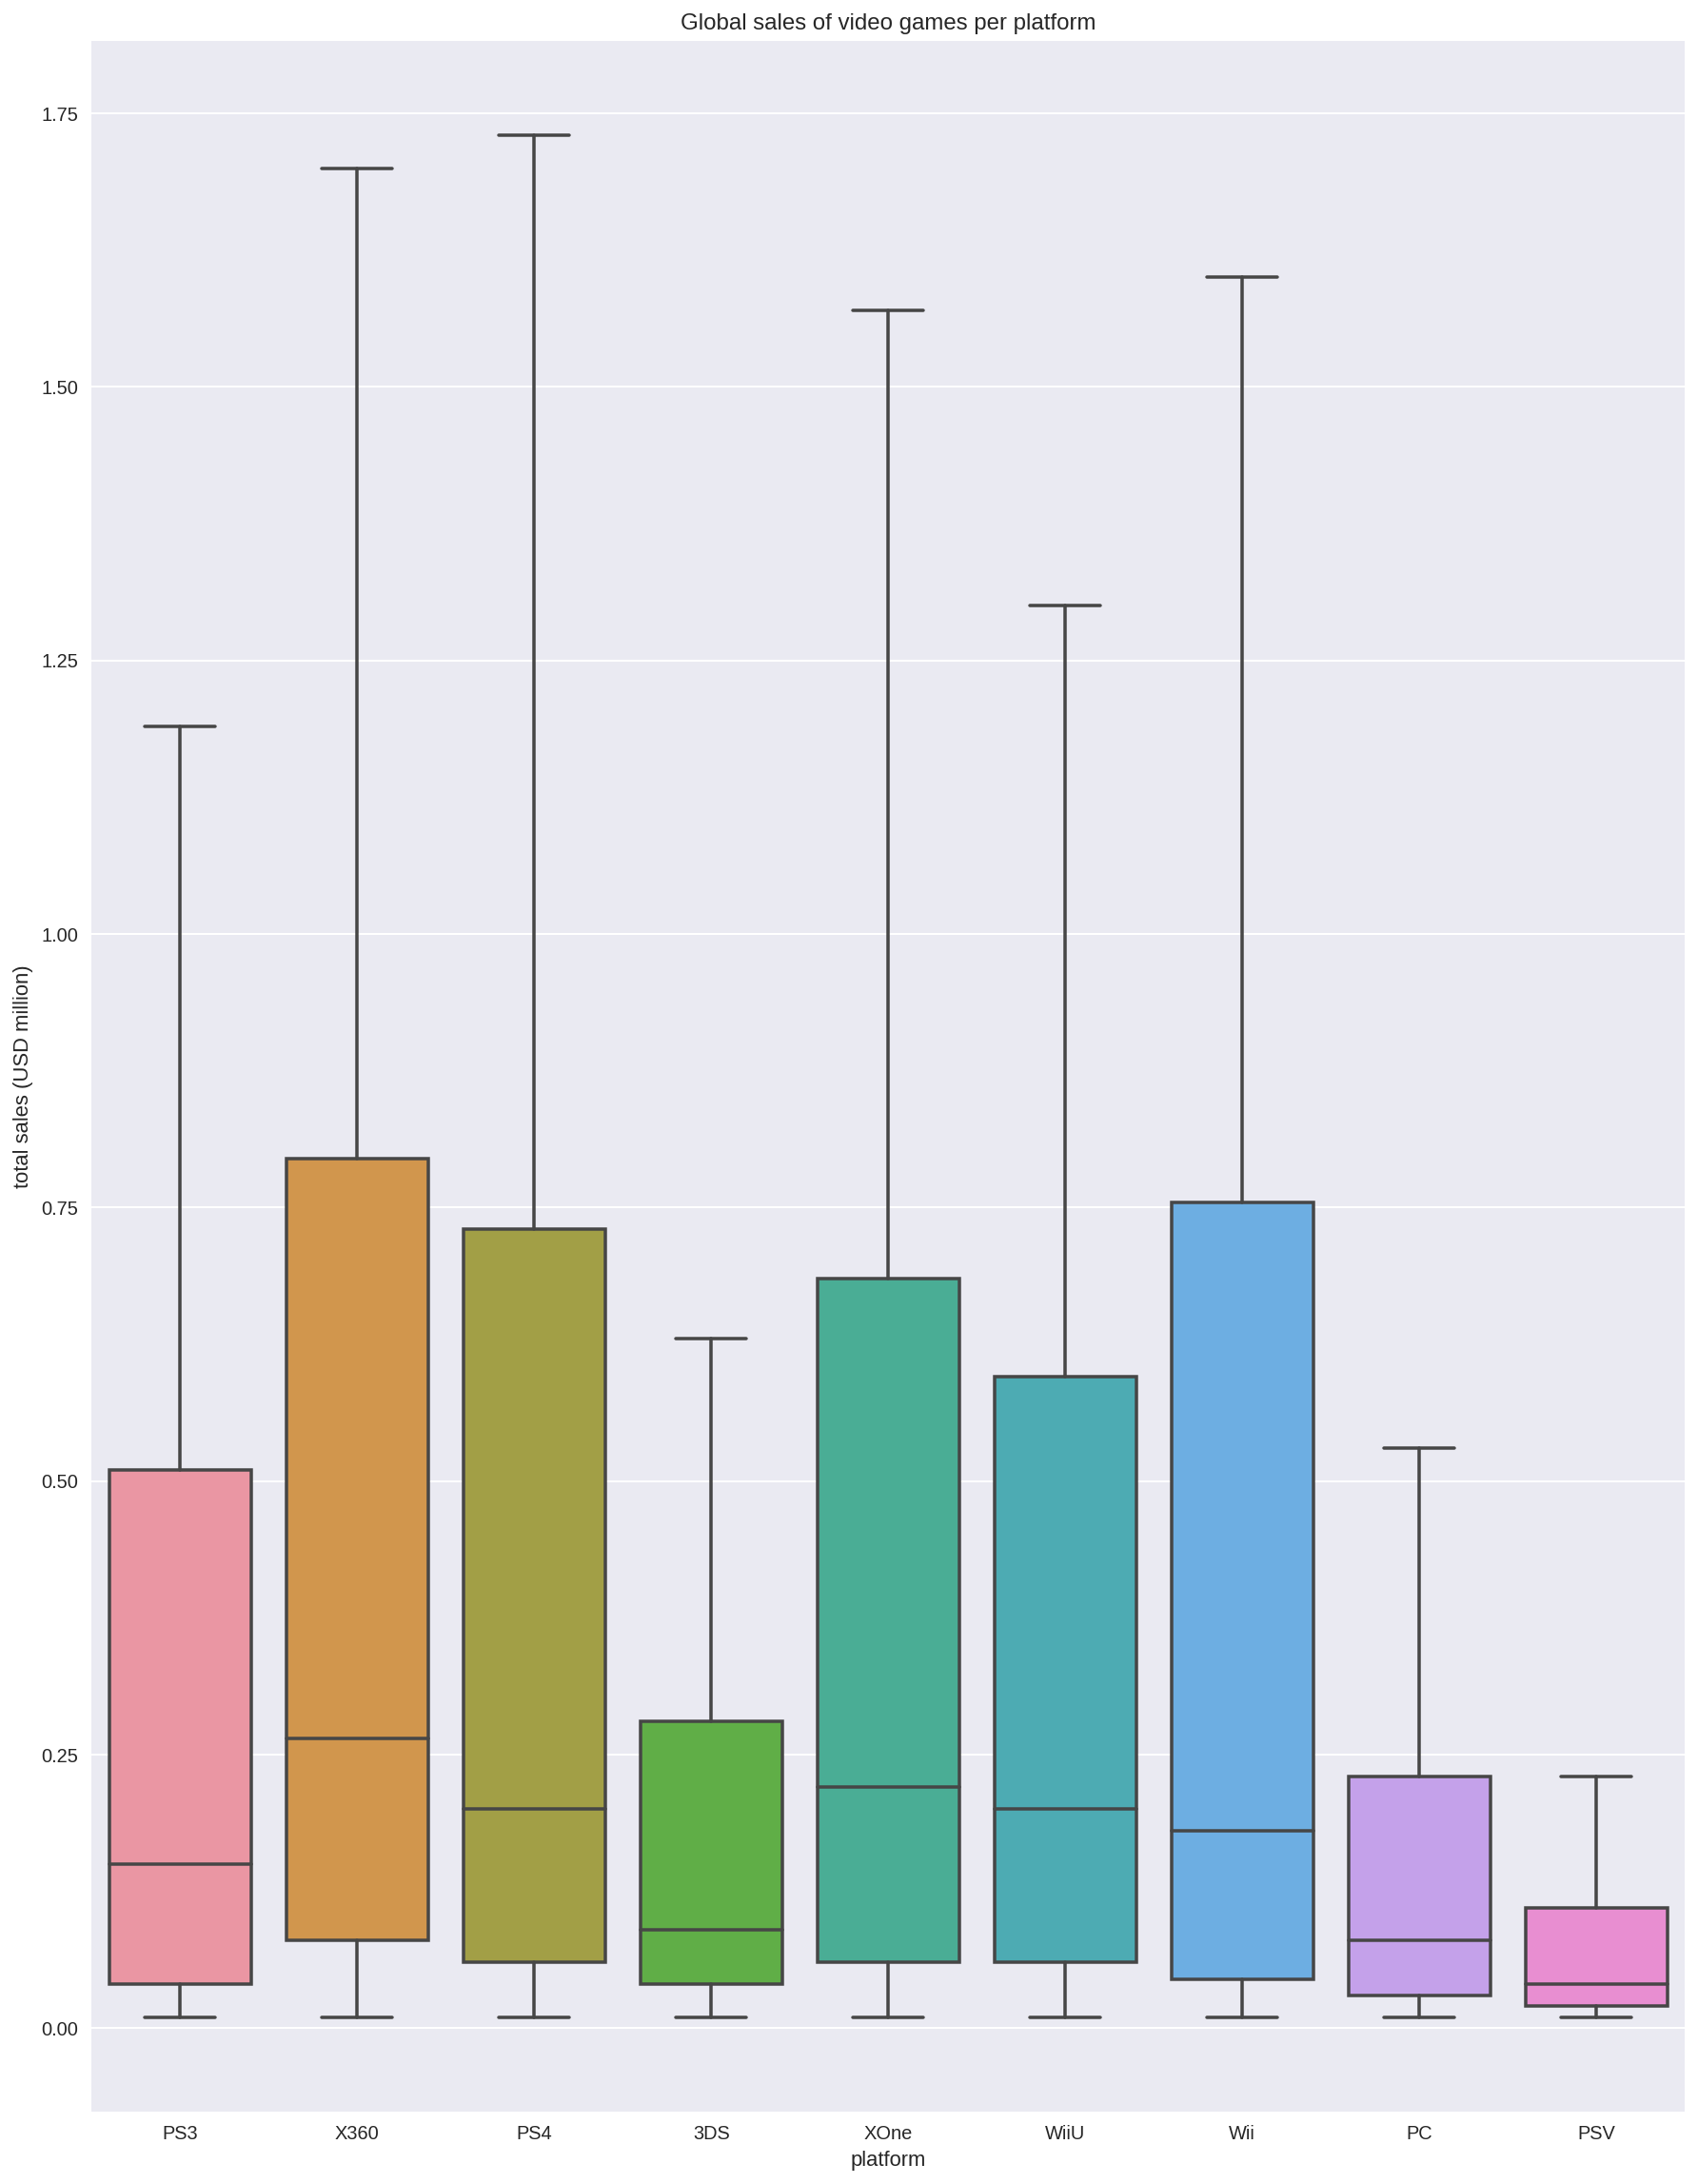

In [79]:
global_sales_platform= sns.boxplot(x='platform', y='total_sales', data=relevant_data, showfliers = False)
plt.gcf().set_size_inches(15, 20)
plt.ylabel('total sales (USD million)')
plt.title('Global sales of video games per platform')
plt.show()



Based on the information from the `global_sales_platform` boxplot above and the `global_sales_platform_desc` table, we observed that the platforms with the 3 greatest means were PS4, X360, and XOne, with values of 0.80, 0.74, and 0.65 million USD, respectively. Since all platforms presented outliers greater than 1.5*IQR, then the median represents a better interpretation of the distribution. The platforms with the 3 greatest medians were X360, XOne, and PS4 with median values of 0.27, 0.22, and 0.20 million USD, respectively. Reharding the distribution, the platforms with the 3 greatest standard deviations were X360, PS4, and PS3 with values of 1.65, 1.61, and 1.45 million USD, respectively. The platform that had the greatest maximum value was PS3 with a value of 21.05 millions USD. The platform with the smallest minimim value was 3DS with a values of 0.01 million USD. The distribution of total sales for all platforms is a positive skewed distribution, with outliers greater than 1.5*IQR. 

In [80]:
global_sales_platform_desc=relevant_data.groupby('platform')['total_sales']
global_sales_platform_desc.describe().sort_values('min', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.040,0.090,0.280,14.60
PC,190.0,0.209368,0.351521,0.01,0.030,0.080,0.230,3.05
PS3,345.0,0.525884,1.451939,0.01,0.040,0.150,0.510,21.05
PS4,392.0,0.801378,1.609456,0.01,0.060,0.200,0.730,14.63
PSV,358.0,0.092151,0.153816,0.01,0.020,0.040,0.110,1.96
Wii,23.0,0.593913,0.915432,0.01,0.045,0.180,0.755,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.060,0.200,0.595,7.09
X360,186.0,0.735484,1.663275,0.01,0.080,0.265,0.795,16.27
XOne,247.0,0.645020,1.036139,0.01,0.060,0.220,0.685,7.39


### How does professional and user reviews affect total sales for a platform? 

This section was used to analyze the correlation between total sales and user and profession critic scores, for PS4. The scatterplot for total sales vs. professional critic score presented a positive, weak relationship with a correlation coefficient of 0.41. On the other hand, the scatterplot for total sales vs. user critic score presented a negative, weak relatioship with a correlation coefficient of -0.03. The professional critic score presented a stronger relationship than user critic scores. 


correlation coefficient: 0.40656790206178095


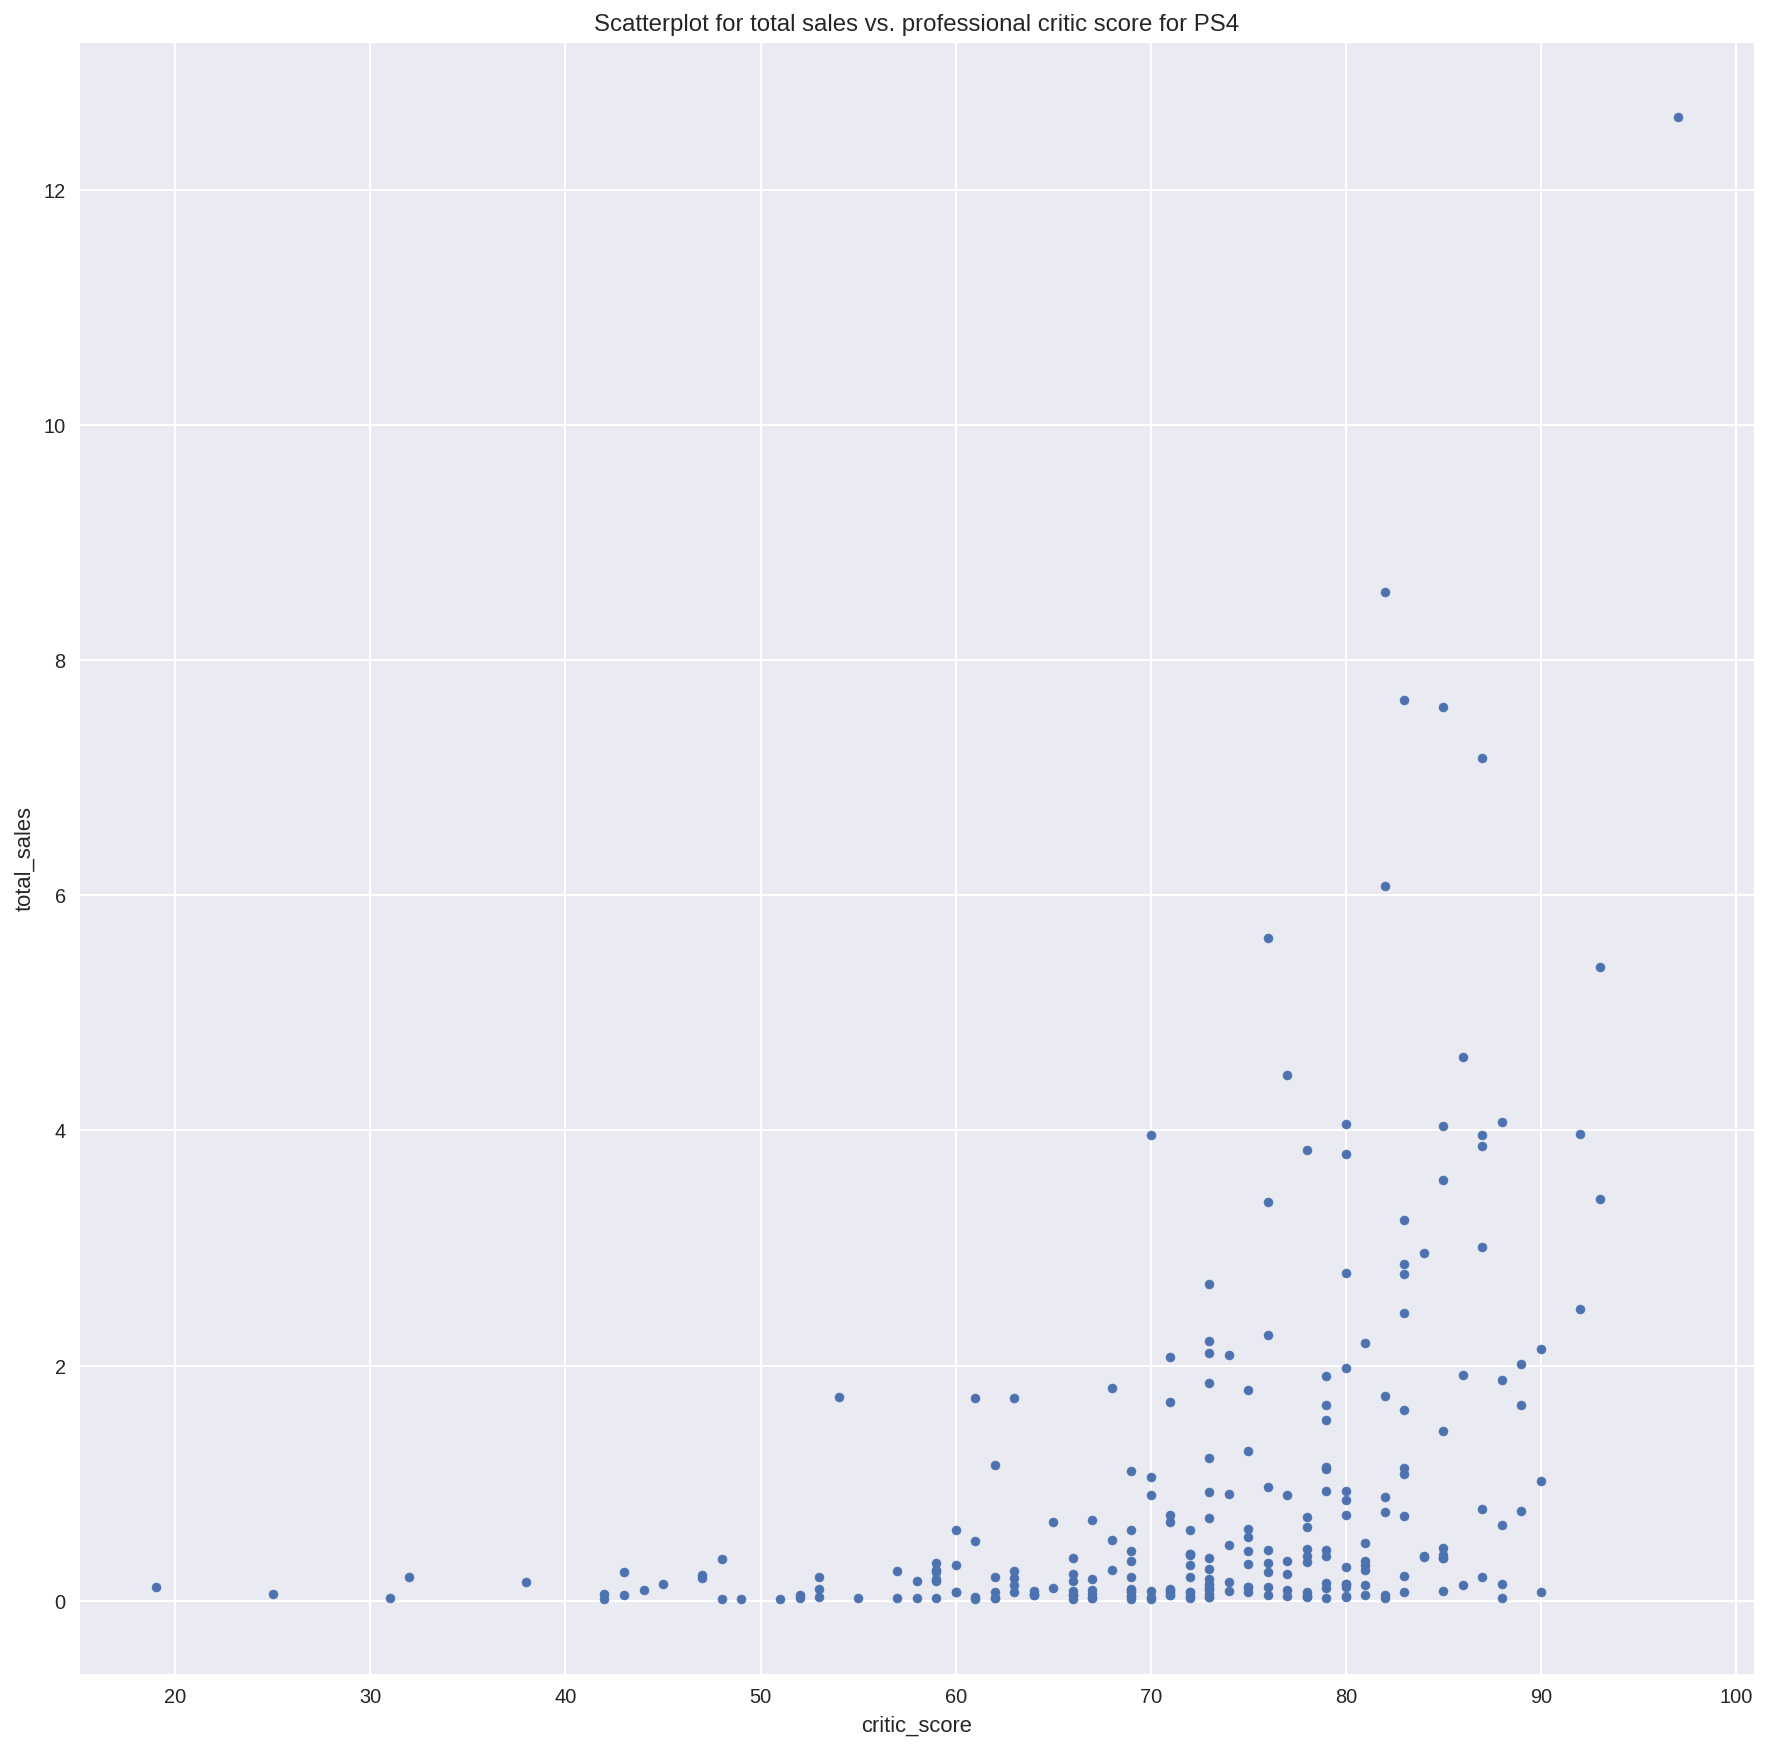

In [81]:
critic_score_sales=relevant_data.query('platform=="PS4"').plot(
    kind='scatter', x='critic_score', y='total_sales', figsize=(15,15))
plt.title('Scatterplot for total sales vs. professional critic score for PS4')

corr_coef= relevant_data.query('platform=="PS4"')['critic_score'].corr(relevant_data.query('platform=="PS4"')['total_sales'])
print('correlation coefficient:', corr_coef)
critic_score_sales
plt.show()

correlation coefficient: -0.031957110204556376


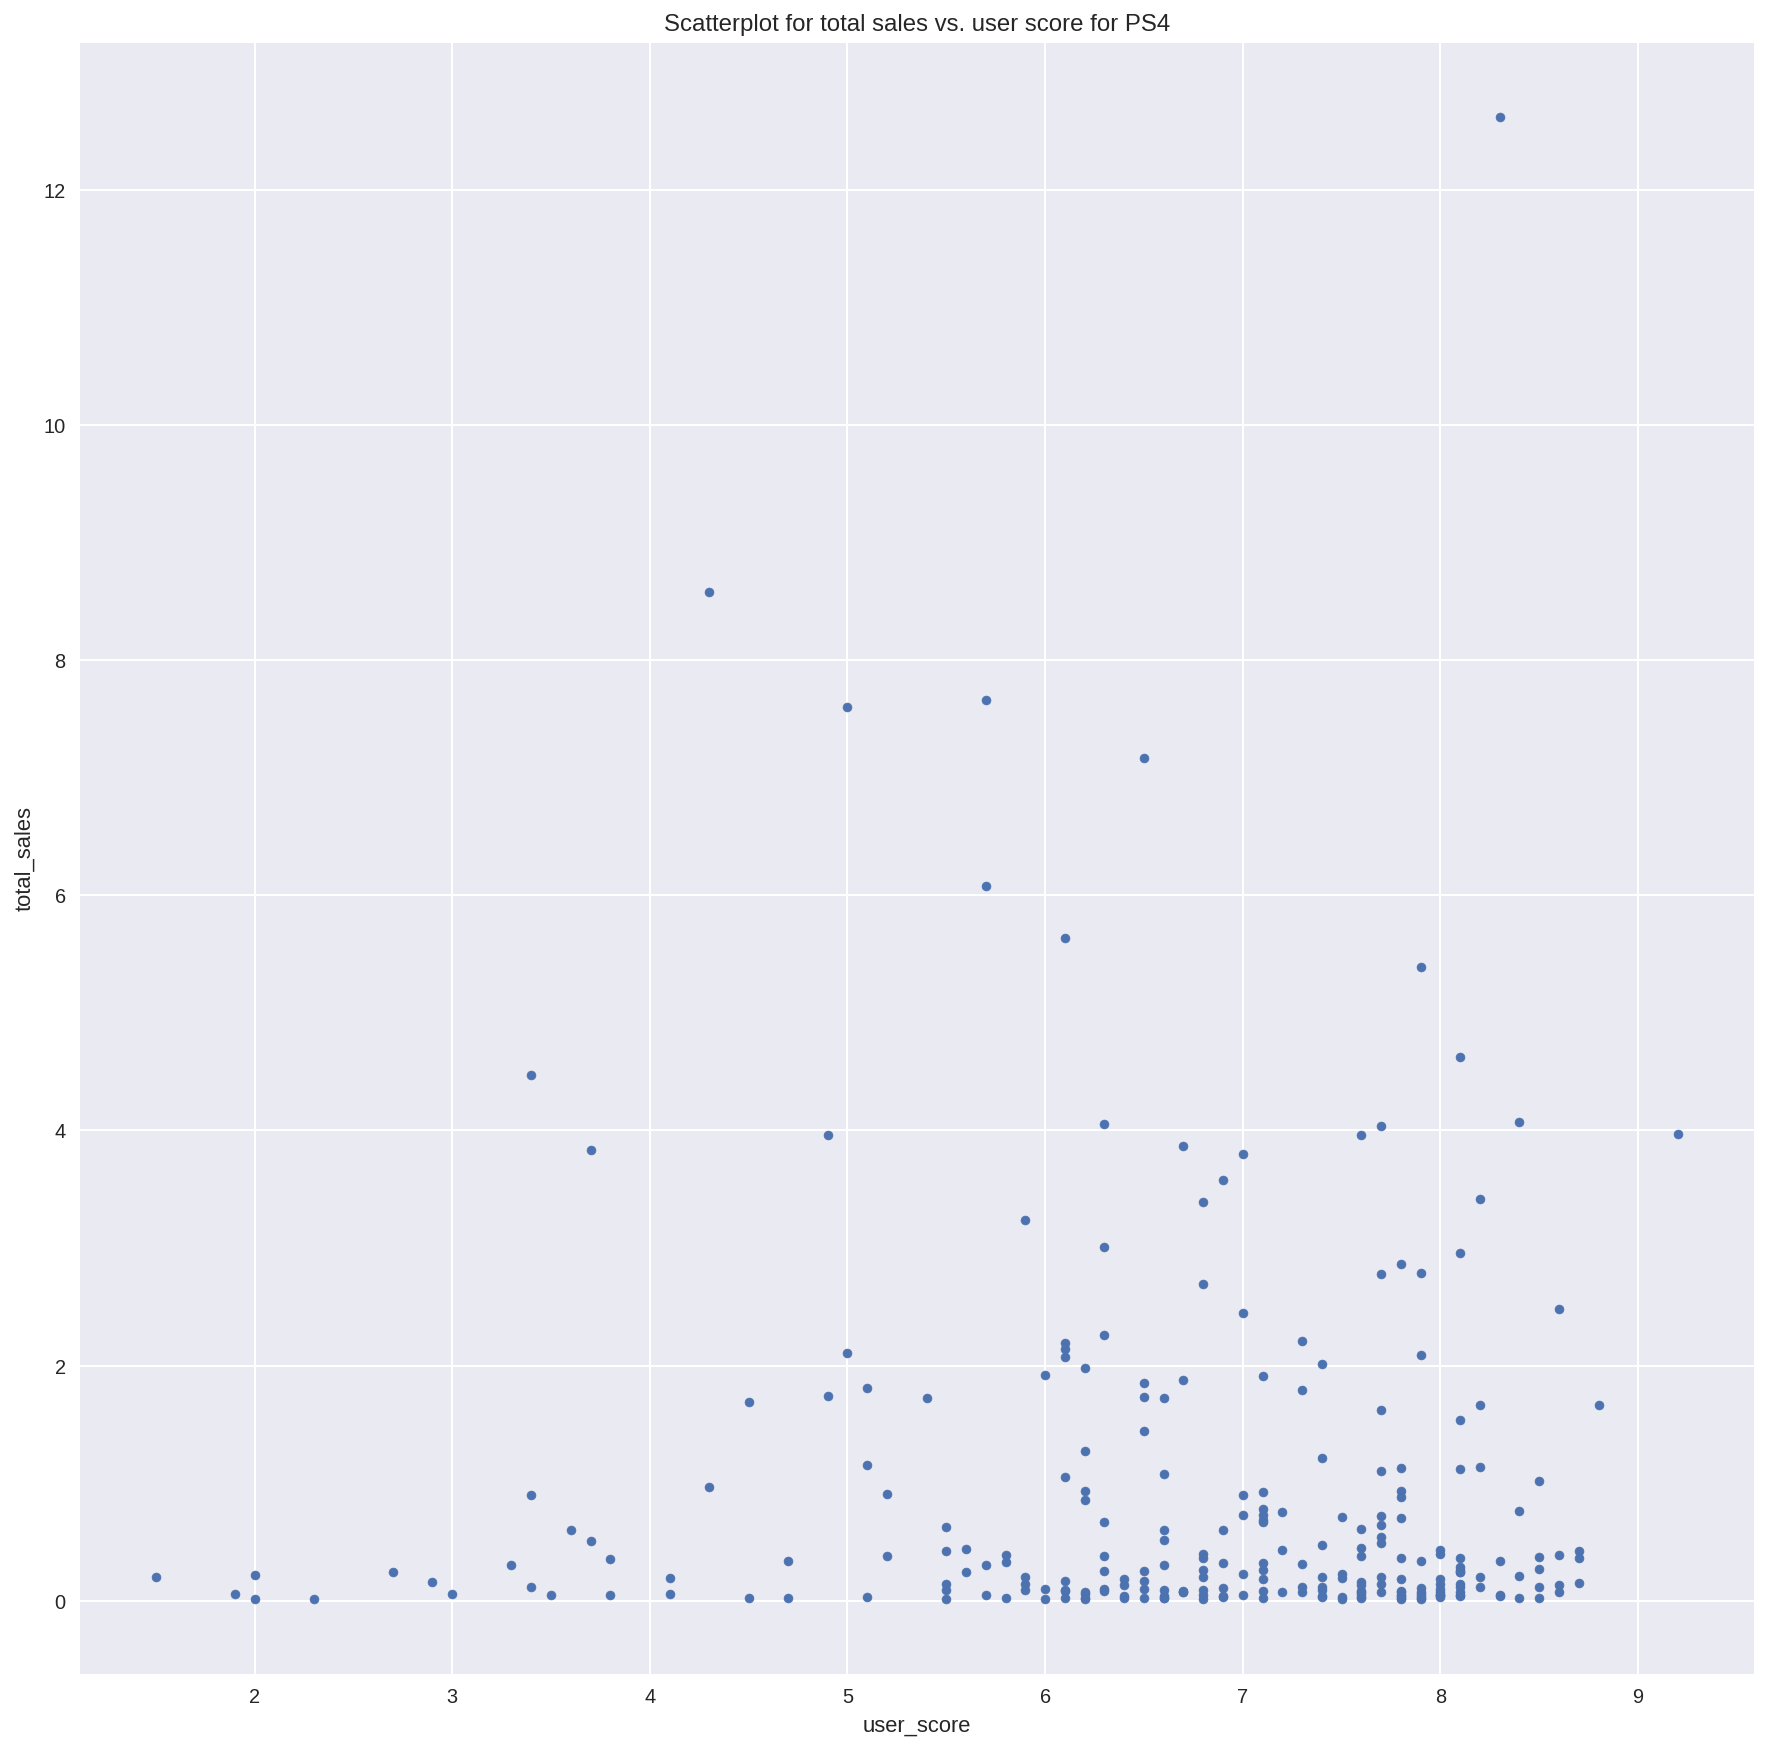

In [82]:
user_score_sales=relevant_data.query('platform=="PS4"').plot(
    kind='scatter', x='user_score', y='total_sales', figsize=(15,15))
plt.title('Scatterplot for total sales vs. user score for PS4')

corr_coef=relevant_data.query('platform=="PS4"')['user_score'].corr(relevant_data.query('platform=="PS4"')['total_sales'])
print('correlation coefficient:', corr_coef)
user_score_sales
plt.show()

### Comparing total sales of same games in other platforms. 

In this section, we compared the total sales of same games on the top 3 leading-sales platforms: __PS4,PS3, and XOne__. Based on the distribution depicted in `games_shared_3`, we conclude that PS4 presented the highest mean for total sales of the same games also sold in PS3 and XOne, with a value of 1.56 million USD. PS3 and XOne presented means values of total sales, for the same video games sold, of 1.09 and 0.80 million USD, respectively. The distributions of total sales for the same games sold in the top 3, leading-sales platforms, were positively skewed, with outliers greater than 1.5*IQR. Similarly, PS4 had the greatest median value than PS3 and XOne, with a value of 0.67 million USD; compared to PS3 and XOne that had medians of 0.44 and 0.34 million USD, respectively. The distribution of total sales for same games sold in the top 3, leading-sales platforms presented standard deviation values of 2.41, 2.44, and 1.20 million USD, for PS4, PS3, and XOne, respectively. This means that the distribution for total sales of sames games for PS3 was more spreaded out, compared to the other platforms. The platform that had the highest value for total sales of the same games was PS3, with a value of 21.05 millions USD. 

platform,PS4,PS3,XOne
count,103.000000,103.000000,103.000000
mean,1.561942,1.086117,0.798641
std,2.415037,2.435822,1.206874
min,0.020000,0.010000,0.010000
25%,0.280000,0.115000,0.115000
50%,0.670000,0.440000,0.340000
75%,1.810000,0.940000,0.850000
max,14.630000,21.050000,7.390000


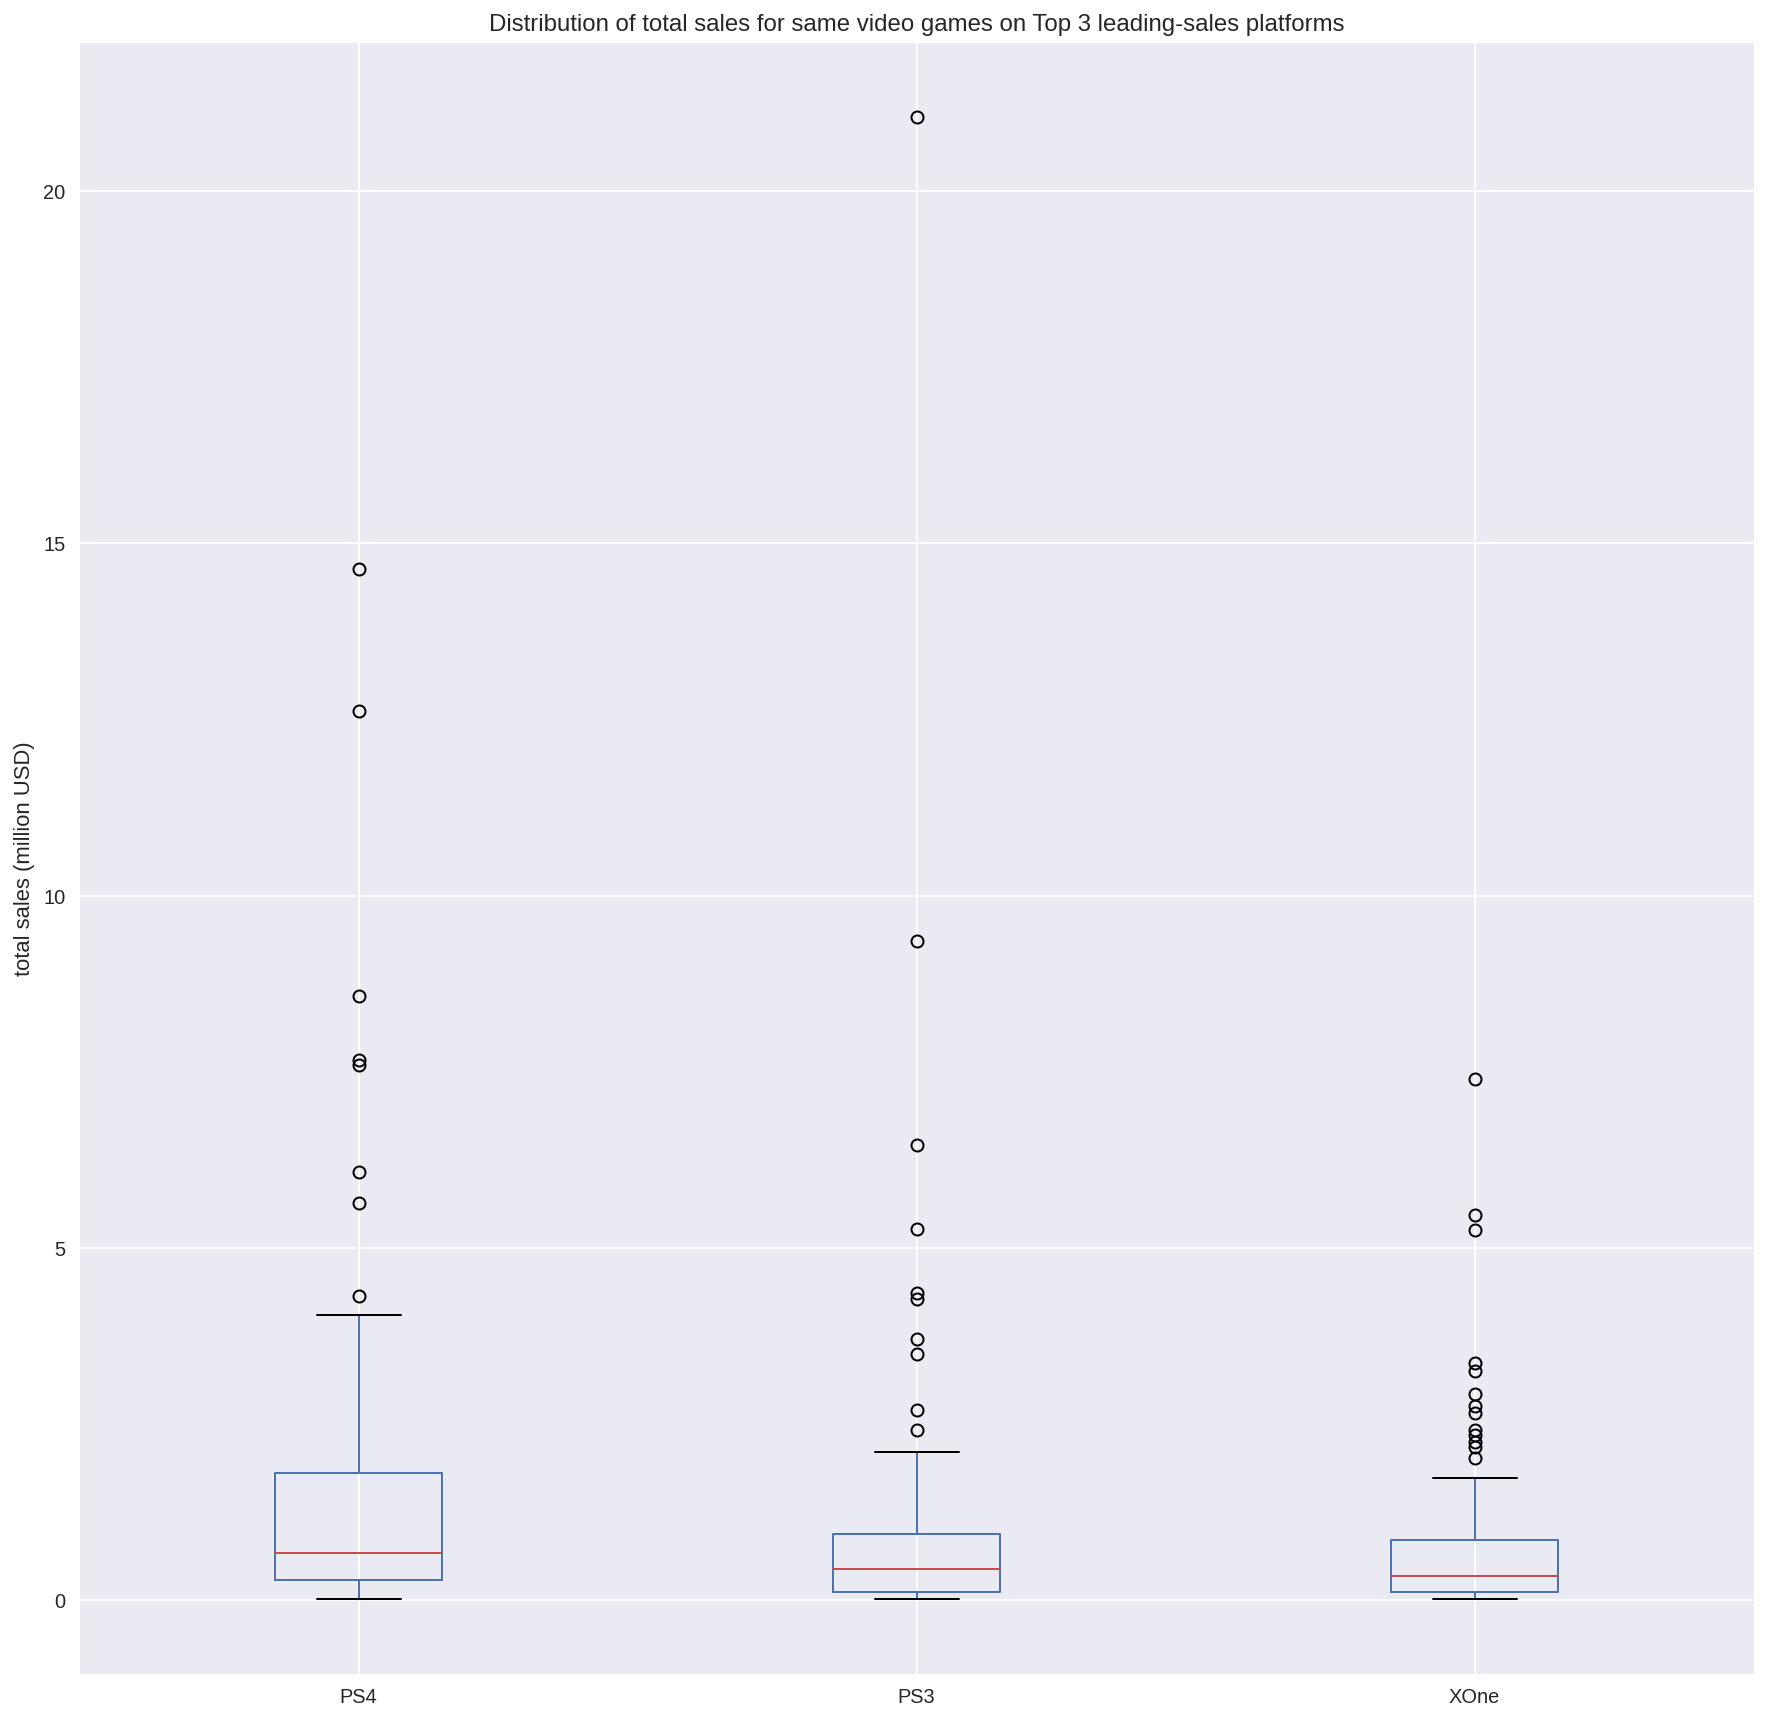

In [83]:
games_shared=relevant_data[relevant_data.duplicated(subset='name', keep=False)]
games_shared_pivot=games_shared.pivot_table(index='name', columns='platform', values='total_sales', aggfunc='sum')

games_shared_3=games_shared_pivot.query('PS4.notnull() and PS3.notnull() and XOne.notnull()')[['PS4','PS3','XOne']]

games_shared_3.plot(kind='box', figsize=(15,15))
plt.title('Distribution of total sales for same video games on Top 3 leading-sales platforms')
plt.ylabel('total sales (million USD)')
games_shared_3.describe()

### Distribution of total sales by video game genres

In this section, we analyzed the distribution of total sales by genres. Based on the distrubtuion presented in `genre_dist`, we conclude that the top 3 most profitable genres were __Action, Shooter, and Sports__, with total sales values of 320.86, 232.98, and 149.93 million USD, respectively. On the other hand, the bottom 3 least profitable genres were __puzzle, strategy, and simulation__, with total sales values of 3.17, 10.06, and 21.55 million USD, respectively. One characteristic of top 3 leading-sales genres is that they were on the top 3 leading-sales platforms, PS4, PS3, and XOne, as shown in the `genre_platform` table. 

,total_sales
genre,
Action,320.86
Shooter,232.98
Sports,149.93
Role-Playing,144.86
Misc,62.57
Platform,41.94
Racing,39.89
Fighting,35.29
Adventure,22.90


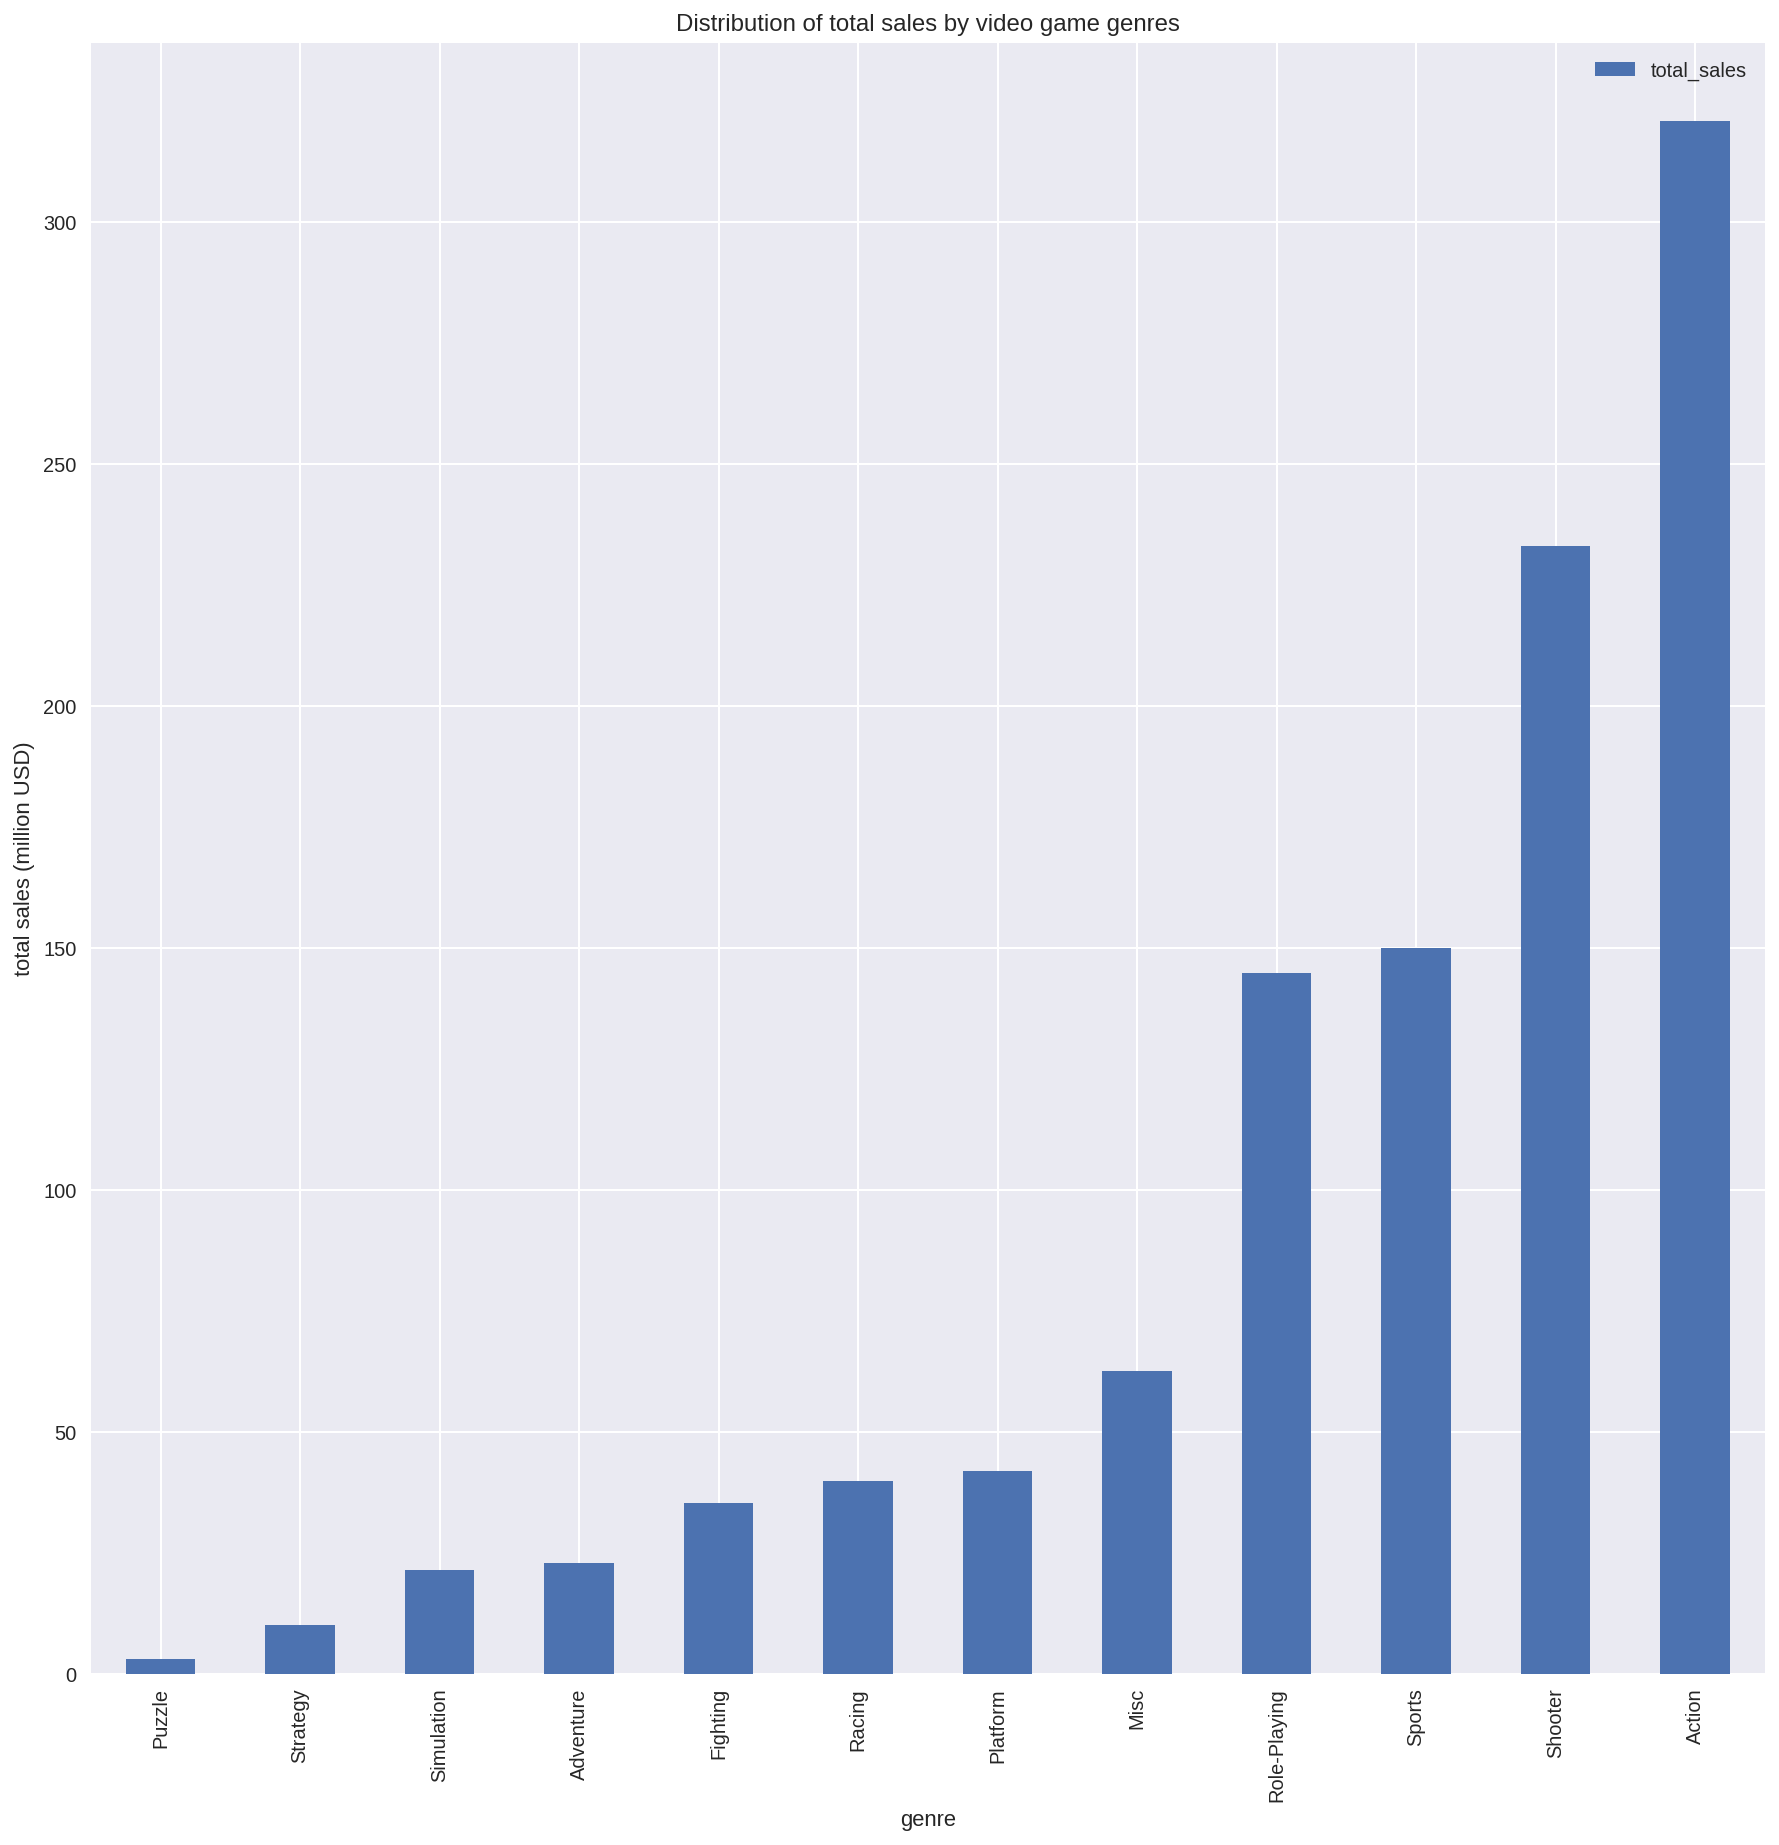

In [84]:
genre_dist=relevant_data.pivot_table(
index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales').plot(kind='bar', figsize=(15,15))
plt.title('Distribution of total sales by video game genres')
plt.ylabel('total sales (million USD)')

relevant_data.pivot_table(
index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)


In [85]:
genre_platform=relevant_data.query('genre=="Action" | genre=="Shooter" | genre=="Sports"').platform.value_counts(
    normalize=True)*100

genre_platform

PS4     20.121951
PS3     16.724739
XOne    14.024390
PSV     12.543554
X360    11.062718
3DS     10.888502
PC       8.362369
WiiU     5.313589
Wii      0.958188
Name: platform, dtype: float64

## User profiles for each region 

#### Top 5 leading sales platform foe each region 
In this section we analyzed the top 5 platforms that had leading sales in Japan, North America, and Europe. As shown in `top_5_eu_region` table, the tp 5 leading-sales platforms in the European regions were PS4, PS3, XOne, X360 and 3DS, with values in sales of 141.09, 67.81, 51.59, 42.52, and 30.96 million USD, respectively. On the other hand, the top 5 leading-sales platforms in Japan were 3DS, PS3, PSV, PS4, and WiiU with sale values of 67.81, 23.35, 18.59, 15.96, and 10.88 million USD, respectively. Lastly, the top 5 leading-sales platforms in North America were PS4, XOne, X360, PS3, and 3DS with sale values of 108.74, 93.12, 81.66, 63.50, 38.20 million USD, respectively. 

In [86]:
#top 5 leading-sales plaforms in Europe 
top_5_eu_region=relevant_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
top_5_eu_region.sort_values('eu_sales', ascending=False).head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [87]:
#top 5 leading-sales plaforms in Japan
top_5_jp_region=relevant_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
top_5_jp_region.sort_values('jp_sales', ascending=False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


In [88]:
#top 5 leading-sales plaforms in North America
top_5_na_region=relevant_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
top_5_na_region.sort_values('na_sales', ascending=False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


#### Top 5 leading sales genres for each region 
In this section we analyzed the top 5 genres that had leading sales in Japan, North America, and Europe. As shown in `top_5_eu_genre` table, the tp 5 leading-sales platforms in the European region were Action, Shooter, Sports, Role-Playing, and Racing , with values in sales of 118.12, 87.86, 60.34, 36.97, and 20.19 million USD, respectively. On the other hand, the top 5 leading-sales genres in Japan were Role-Playing, Action, Misc, Fighting, and Shooter with sale values of 50.01, 39.65, 9.03, 7.63, 6.61 million USD, respectively. Lastly, the top 5 leading-sales genres in North America were Action, Shooter, Sports, Role-Playing, and Misc with sale values of 125.89, 109.74, 65.27, 46.40, and 27.46 million USD, respectively. 

In [89]:
#top 5 leading-sales genres in Europe
top_5_eu_genre=relevant_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
top_5_eu_genre.sort_values('eu_sales', ascending=False).head()

,eu_sales
genre,
Action,118.12
Shooter,87.86
Sports,60.34
Role-Playing,36.97
Racing,20.19


In [90]:
#top 5 leading-sales genres in Japan
top_5_jp_genre=relevant_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
top_5_jp_genre.sort_values('jp_sales', ascending=False).head()

,jp_sales
genre,
Role-Playing,50.01
Action,39.65
Misc,9.03
Fighting,7.63
Shooter,6.61


In [91]:
#top 5 leading-sales genres in North America
top_5_na_genre=relevant_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
top_5_na_genre.sort_values('na_sales', ascending=False).head()

,na_sales
genre,
Action,125.89
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.46


#### Do ESRB ratings affect sales in individual regions?
In this section, we analyzed if the ESRB ratings affect sales in individual regions. The table `regions_rating_sales` depicts the distribution of total sales per region for each ESRB rating. From the table, we can conclude that video games with ratings __T, E10+, and M,__ affect sales in Japan to have less sales because they presented a difference greater than 5% of total sales for games with these ratings. Since Japan makes up for 12.7% in total sales, we would have expected a a similar percentage for video game with these ratings. Similarly, we concluded that sales in North America are affects by __E10+, and M__ ratings because we expected a percentage for video games with these ratings within 5% difference from 40.3%, which is the percentage of north american sales from total sales. Lastly, we concluded that ratings __E and M__ affect sales in Europe because sales for video game ratings were greater in difference than 5% from the expected 36% of European sales from total sales. 

In [92]:
japan_rating_sales=relevant_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
north_a_rating_sales=relevant_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
europe_rating_sales=relevant_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')

regions_rating_sales=pd.merge(japan_rating_sales,north_a_rating_sales, how='outer', on='rating')
regions_rating_sales=pd.merge(regions_rating_sales,europe_rating_sales, how='outer', on='rating')
regions_rating_sales=regions_rating_sales.div(regions_rating_sales.sum(axis=1), axis=0)
regions_rating_sales


,jp_sales,na_sales,eu_sales
rating,,,
E,0.084870,0.446645,0.468485
E10+,0.057497,0.527333,0.415170
M,0.043422,0.508601,0.447977
T,0.182207,0.443840,0.373953
unknown,0.328410,0.356948,0.314641


In [93]:
regions_sales=relevant_data[['eu_sales', 'na_sales', 'jp_sales']]
regions_sales.sum()/relevant_data['total_sales'].sum()

eu_sales    0.360460
na_sales    0.402578
jp_sales    0.126602
dtype: float64

The pie chart below, `region_sales_pie`, sumarizes the distribution of percentages of sales per region from total sales. The bar plot summarizes the distribution of sales of video games per region per rating. 

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


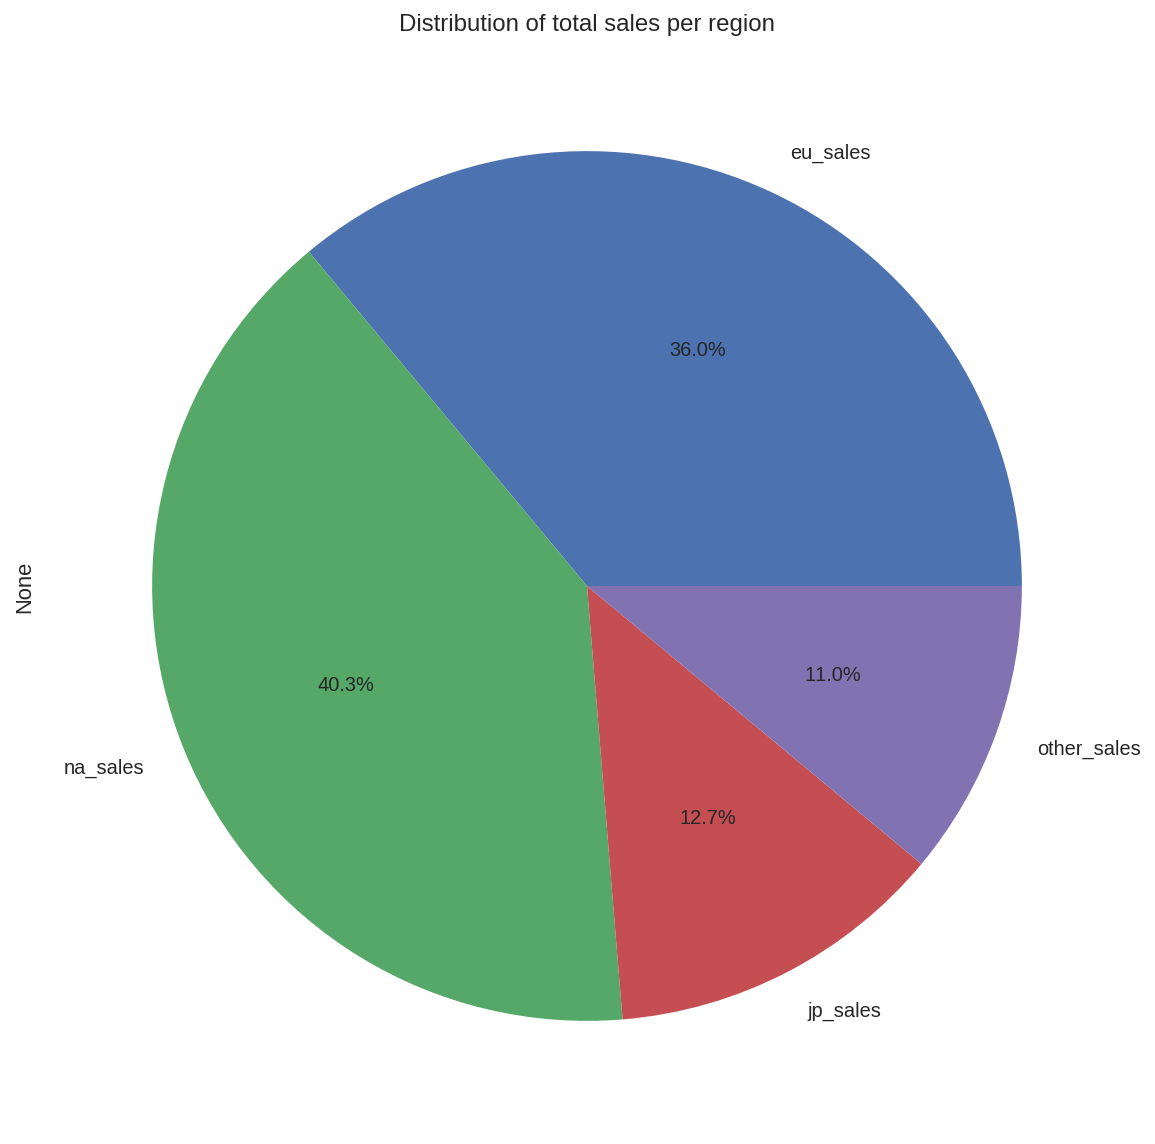

In [94]:
regions_sales=relevant_data[['eu_sales', 'na_sales', 'jp_sales', 'other_sales']]
region_sales_pie=regions_sales.sum()/relevant_data['total_sales'].sum()
region_sales_pie.plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')
plt.title('Distribution of total sales per region')
plt.show()

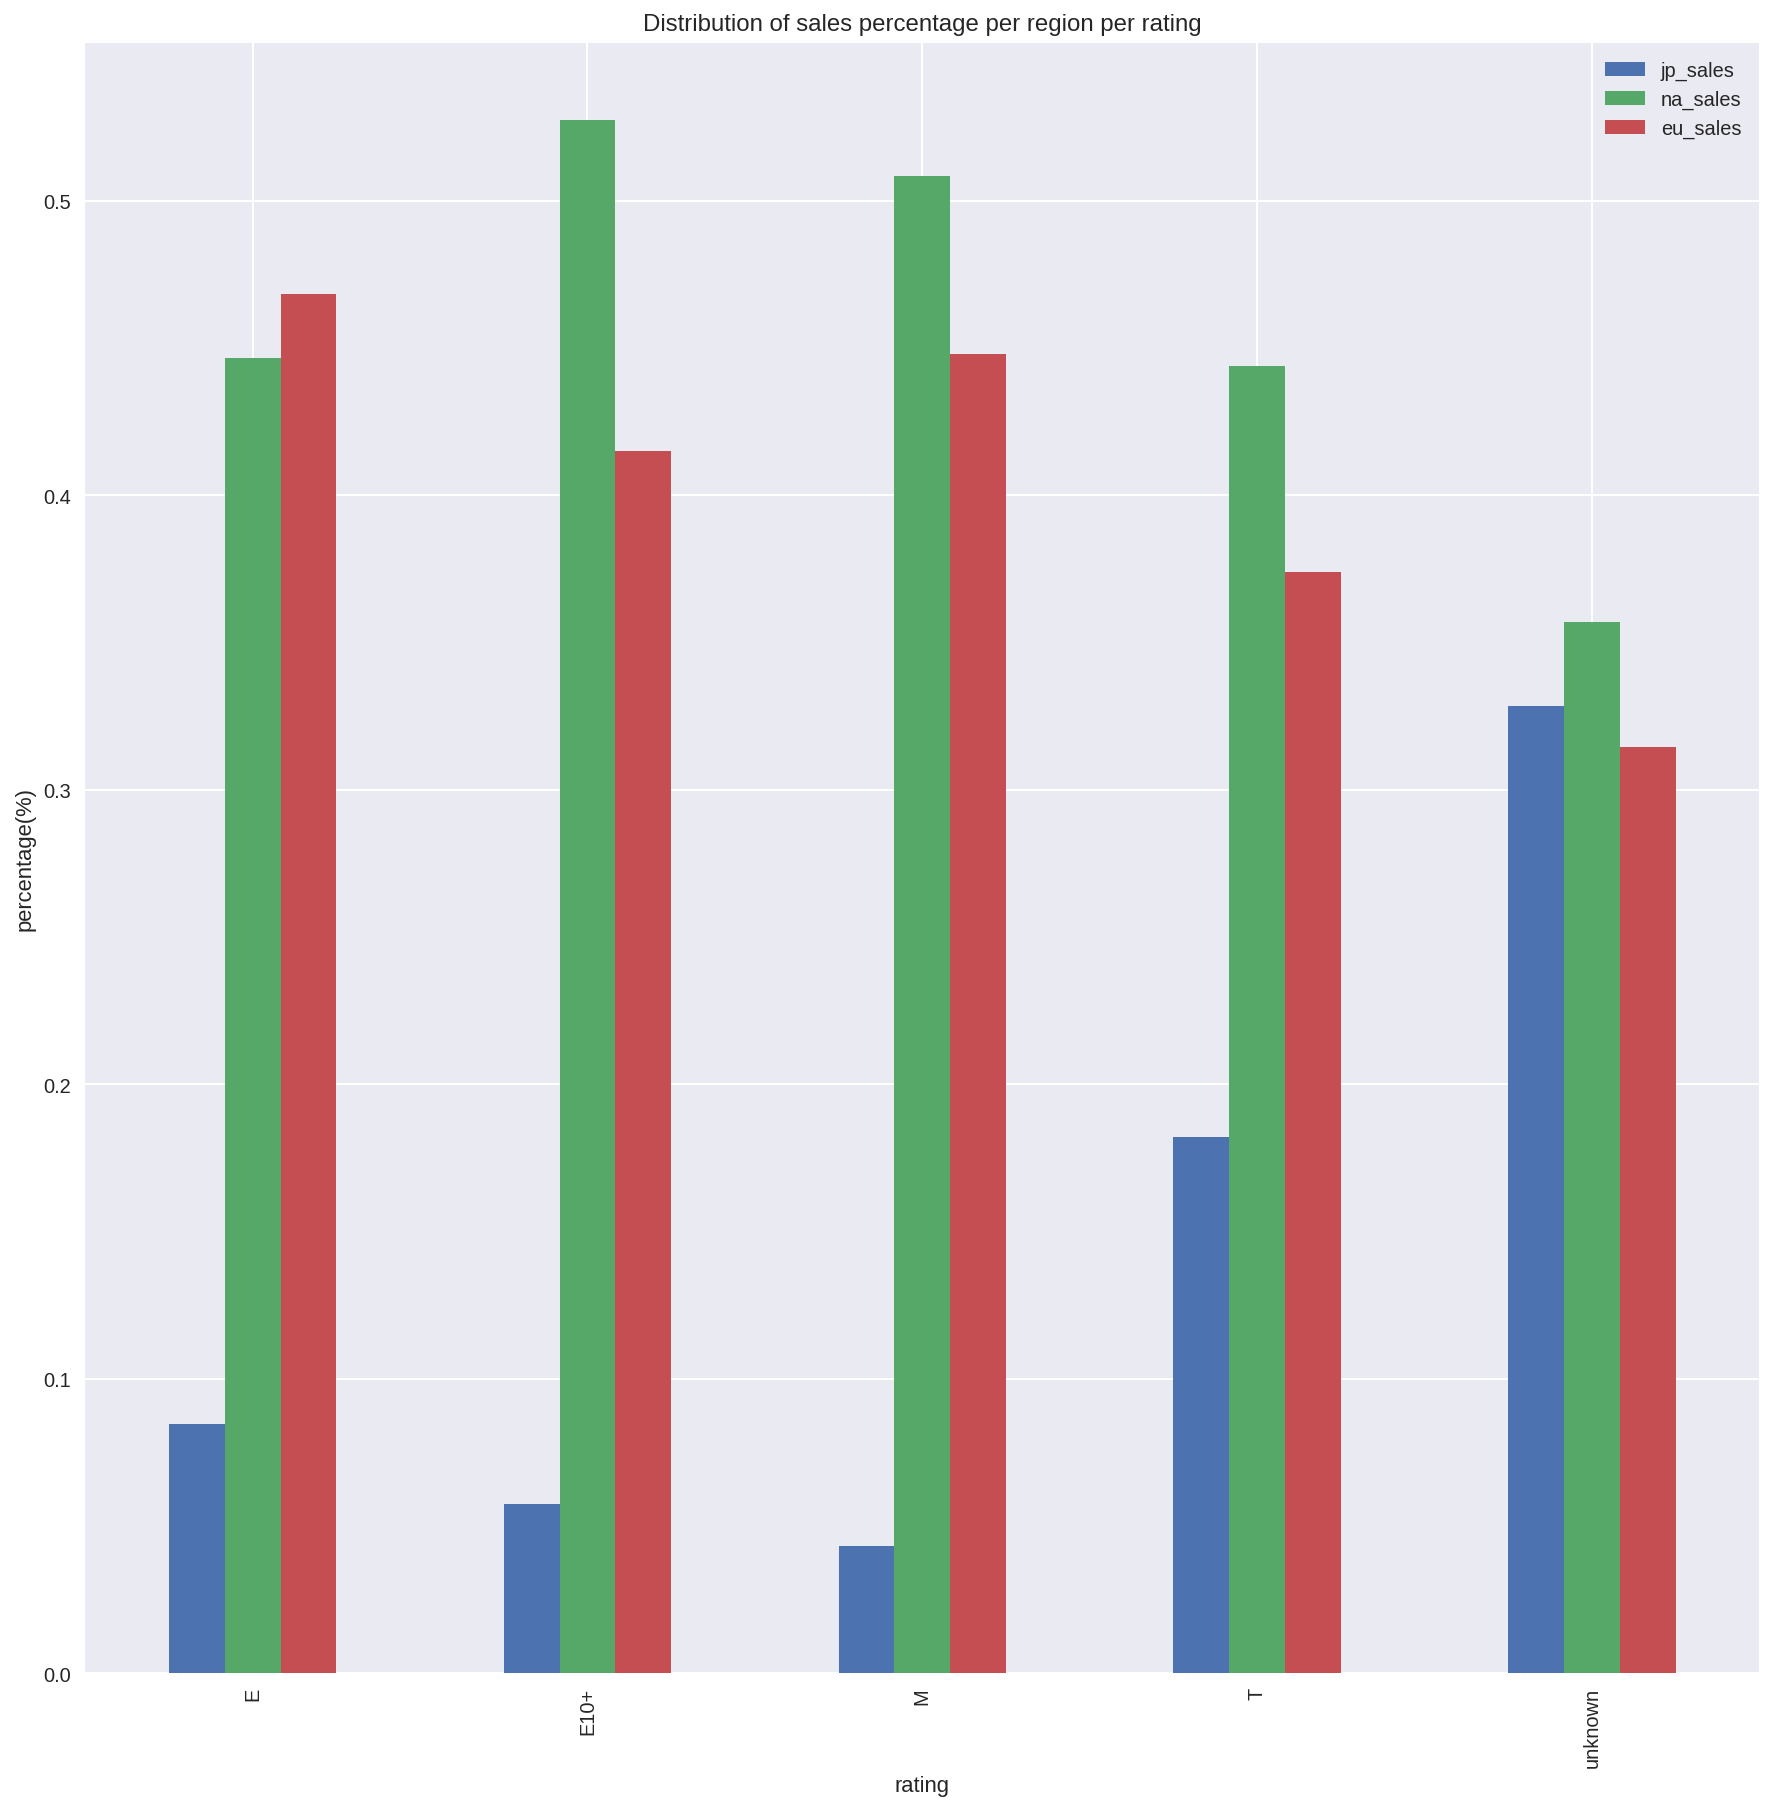

In [95]:
regions_rating_sales.plot(kind='bar', figsize=(15,15), )
plt.ylabel('percentage(%)')
plt.title('Distribution of sales percentage per region per rating')
plt.show()

## Testing statistical hypothesis

#### XOne and PC user ratings 
This section was used to test whether the average user rating score for platforms, Xone and PC, were statistically different. We tested the statistical hypothesis below for 95 statistical significance: 
- `H0`: The average user rating score for the platform XOne equals the average user rating for the platform PC. 
- `H1`: The average user rating score for the platform XOne does not equal the average user rating for the platform PC.

Based from the statistical test below, we conclude that we failed to reject the null hypotheis for 95% statistical significance and conclude that we do not have enough evidence to conclude that there is a difference between the average user rating score between platforms XOne and PC. 

In [96]:
xone_user_rating= relevant_data.query('platform=="XOne" and user_score.notnull()')['user_score'].to_list()
pc_user_rating= relevant_data.query('platform=="PC" and user_score.notnull()')['user_score'].to_list()

xone_user_rating

alpha=0.05

results=st.ttest_ind(xone_user_rating, pc_user_rating)
                      
p_value= results.pvalue

print(p_value)

if results.pvalue < alpha :
    print ('we reject the null')
else:
    print ('we cannot reject the null')
    


0.16390354211387628
we cannot reject the null


#### Action and Sports  user ratings 
This section was used to test whether the average user rating score for genres, Action and Sports, were statistically different. We tested the statistical hypothesis below for 95% statistical significance: 
- `H0`: The average user rating score for the genre Action equals the average user rating for the genre Sports. 
- `H1`: The average user rating score for the genre Action does not equal the average user rating for the genre Sports.

Based from the statistical test below, we conclude that we rejected the null hypotheis for 95% statistical significance and conclude that we have enough evidence to conclude that there is a difference between the average user rating score between genres Action and Sports. 

In [97]:
action_user_rating= relevant_data.query('genre=="Action" and user_score.notnull()')['user_score'].to_list()
sports_user_rating= relevant_data.query('genre=="Sports" and user_score.notnull()')['user_score'].to_list()


alpha=0.05

results=st.ttest_ind(action_user_rating,sports_user_rating)
                      
p_value= results.pvalue

print(p_value)

if results.pvalue < alpha :
    print ('we reject the null')
else:
    print ('we cannot reject the null')

1.3759835176203203e-27
we reject the null


## General Conclusion 


From sections 5 and 6 of project, we conclude that on average, there are 444.91 video games released each year, this distribution of video games released per year had a a median value of 338 video games; and a standard deviation of 452.17 video games per year. The distribution was positively skewed, with a maximun value of 1,429 video games, and a minimum value of 9 video games released per year. In section 5.2, we found that the total sales per platform had  a mean of 284.88 USD millions from sales; a median value of 200.00 USD million dollars from sales; and a standard deviation 345.30 USD millions from sales. The distrbution presented outliers that were greater than 1.5*iqr, 720.8 USD millions. With that said, platforms with sales  that were greater thane 75% quartile of the distibution of total sales per platform were selected for further analysis on pattern of sales. 

From the platforms with greatest sales, we concluded that the the videogames that used to be popular, and now total sales of zero, at the time the data was collected in December 2016, include __DS, GBA, PS, and PS2__. 
From the platforms with greatest sales, we also analyzed the time it takes for old platforms to fade. We selected platforms that were below or equal to the median value for initial year of sales. In other words,  considered platforms that were below or equal to the median value for initial year, for platforms with greatest sales, as 'Old'. We concluded that on average, it took old platforms 5 years to observe a fade in sales after it reached its maximum sales per year. The distibution had a median value of 5.5 years, and a standard deviation of 2.07 years.
We also analyzed the time that it takes new platforms to appear.  Based on the results, we found that on average, it takes 4 years for a new platform to appear. The distribution presented a median values of 5 years; a standard deviaton of 3.65 years; a minimum value of 0 years; and a maximum value of 9 years for new platforms to appear.
To make prognosis for 2017 sales, we selected relevant video games that had been released within 4 years of 2016, because that is the median time that it takes o reach a maximum point in total sales per year after initial year of sales. The platforms that were in the relevant data were __PS4, PS3, XOne, 3Ds, X360, WiiU, PC, PSV, and Wii.__

From the relevant data, we observed that the top 3 leading platforms with highest total sales are __PS4, PS3, and XOne__, with total sales values, in million USD, of 314.14, 181.43, and 159.32, respectively. The bottom 3 platforms with lowest total sales were __Wii, PSV, and PC__ with total sale values , in million USD, of 13.66,32.99, and 39.79, respectively. 

From the relevant data, we concluded that the platforms that had growing pattern in sales per year were __XOne and PS4__, with an average difference increase of 2.39 and 14.42 total sales/ year, respectively. Similarly, we concluded that the platforms with with the greatest global sale medians were __X360, XOne, and PS4__ with median values of 0.27, 0.22, and 0.20 million USD, respectively. 
In section 5.6, we analyzed how professional and user reviews affect total sales for a platform. We concluded that the relationship for  total sales vs. professional critic score presented a positive, weak relationship with a correlation coefficient of 0.41. On the other hand, the relationship for  sales vs. user critic score presented a negative, weak relatioship with a correlation coefficient of -0.03. The professional critic score presented a stronger relationship than user critic scores.
In section 5.7, we compared  the total sales of same games on the top 3 leading-sales platforms: __PS4,PS3, and XOne__. We concluded that PS4 presented the highest mean for total sales of the same games also sold in PS3 and XOne, with a value of 1.56 million USD. PS3 and XOne presented means values of total sales, for the same video games sold, of 1.09 and 0.80 million USD, respectively.
In section 5.8, we analyzed the distribution of total sales by video games genres and concluded that the top 3 most profitable gentre were __Action, Shooter, and Sports,__ with total sales values of 320.86, 232.98, and 149.93 million USD, respectively. On the other hand, the bottom 3 least profitable genres were __puzzle, strategy, and simulation__, with total sales values of 3.17, 10.06, and 21.55 million USD, respectively.

In section 6,  we analyzed the top 5 platforms that had leading sales in Japan, North America, and Europe. The top 5 leading-sales platforms in the European regions were __PS4, PS3, XOne, X360 and 3DS__, with values in sales of 141.09, 67.81, 51.59, 42.52, and 30.96 million USD, respectively. On the other hand, the top 5 leading-sales platforms in Japan were __3DS, PS3, PSV, PS4, and WiiU__ with sale values of 67.81, 23.35, 18.59, 15.96, and 10.88 million USD, respectively. Lastly, the top 5 leading-sales platforms in North America were __PS4, XOne, X360, PS3, and 3DS__ with sale values of 108.74, 93.12, 81.66, 63.50, 38.20 million USD, respectively.
We also analyzed the top 5 leading-sale genres for each region, and concluded that  the tp 5 leading-sales platforms in the European region were __Action, Shooter, Sports, Role-Playing, and Racing__ , with values in sales of 118.12, 87.86, 60.34, 36.97, and 20.19 million USD, respectively. On the other hand, the top 5 leading-sales genres in Japan were __Role-Playing, Action, Misc, Fighting, and Shooter__ with sale values of 50.01, 39.65, 9.03, 7.63, 6.61 million USD, respectively. Lastly, the top 5 leading-sales genres in North America were __Action, Shooter, Sports, Role-Playing, and Misc__ with sale values of 125.89, 109.74, 65.27, 46.40, and 27.46 million USD, respectively.

Finally, we tested whether the average user rating score for platforms, __Xone and PC__, were statistically different. We tested for 95% statistical significance and concluded that we failed to reject the null hypotheis for 95% statistical significance and conclude that we do not have enough evidence to conclude that there is a difference between the average user rating score between platforms XOne and PC. 
Similarly, we tested for 95% statistical significance whether the average user rating score for genres, __Action and Sports__, were statistically different. We conclued that e rejected the null hypotheis for 95% statistical significance and conclude that we have enough evidence to conclude that there is a difference between the average user rating score between genres Action and Sports.